# Importing Libraries:

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import plotly
from plotly import tools
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

import warnings

warnings.filterwarnings('ignore')

# Application Data: 

Reading Dataset 

In [185]:
appl_data = pd.read_csv("application_data.csv")
appl_data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [8]:
appl_data.shape

(307511, 122)

In [9]:
appl_data.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [10]:
appl_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [7]:
appl_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
appl_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [188]:
appl_data.isnull().sum().mean()

75020.20491803279

# Data Cleaning:

In [187]:
null_cols = appl_data.isnull().sum()
null_cols = null_cols[null_cols.values > (0.40 * len(appl_data))]


In [189]:
len(null_cols)


49

. we have 49 columns having null values greater than 40% in application data.

In [190]:
# These 49 columns can be removed
null_cols=list(null_cols.index)
appl_data.drop(labels=null_cols, axis=1, inplace=True)


In [191]:
appl_data.shape


(307511, 73)

In [192]:
#Application data backup
appl_data1 = appl_data
appl_data1.shape

(307511, 73)

In [193]:
#Checking the % of null values for each column in new dataset
impute_cols = appl_data.isnull().sum()/len(appl_data)*100
impute_cols.sort_values(ascending=False).head(30)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


# Data Imputation:

In [194]:
appl_data.OCCUPATION_TYPE.describe()


count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [195]:
appl_data.OCCUPATION_TYPE.mode


<bound method Series.mode of 0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507            NaN
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object>

In [69]:
#OCCUPATION_TYPE is an object categorical variable we can impute with mode value.

In [72]:
appl_data['OCCUPATION_TYPE'] = appl_data['OCCUPATION_TYPE'].fillna(appl_data['OCCUPATION_TYPE'].mode()[0])


In [196]:
appl_data.OCCUPATION_TYPE.describe()


count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [197]:
appl_data.OCCUPATION_TYPE.isnull().sum()


96391

# Errors in Data Types:

In [198]:
appl_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [199]:
#we can see some negative values in the describe so checking the values present in columns starting with 'DAYS' .
print(appl_data['DAYS_BIRTH'].unique())
print(appl_data['DAYS_EMPLOYED'].unique())
print(appl_data['DAYS_REGISTRATION'].unique())
print(appl_data['DAYS_ID_PUBLISH'].unique())
print(appl_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [200]:
days_col = [col for col in appl_data if col.startswith('DAYS')]
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [201]:
#Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive
appl_data[days_col]= abs(appl_data[days_col])

In [202]:
appl_data.CODE_GENDER.value_counts()
# Replacing XNA value with F (i.e. mode value)
appl_data.loc[appl_data.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
appl_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [203]:
appl_data.ORGANIZATION_TYPE.value_counts()
# Replacing XNA with NaN
appl_data = appl_data.replace('XNA',np.NaN)
appl_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [204]:
appl_data.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

# Binning of continuous variables- Derived Metrics:

In [205]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

appl_data['AMT_INCOME_RANGE']=pd.cut(appl_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [206]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

appl_data['AMT_CREDIT_RANGE']=pd.cut(appl_data['AMT_CREDIT'],bins=bins,labels=slots)

In [207]:
Target0=appl_data.loc[appl_data["TARGET"]==0]
Target1=appl_data.loc[appl_data["TARGET"]==1]


In [208]:
# Calculating Imbalance percentage target0 is majority and taget1 is minority
    


round(len(Target0)/len(Target1),2)


11.39

11.39 is the imbalance ratio.

# Univariate Analysis:
#categorical nominal

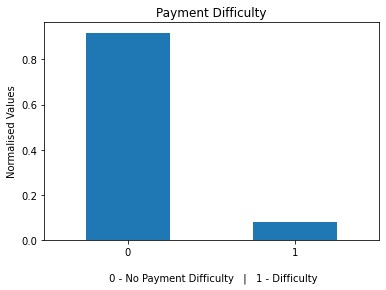

In [209]:
appl_data.TARGET.value_counts(normalize=True).plot.bar()
plt.title("Payment Difficulty")
plt.xlabel("\n 0 - No Payment Difficulty   |   1 - Difficulty")
plt.xticks(rotation =0)
plt.ylabel("Normalised Values")
plt.show()

In [210]:
appl_data[appl_data.TARGET==0].shape[0]/appl_data[appl_data.TARGET==1].shape[0]

11.387150050352467

In [211]:
appl_data.columns[appl_data.dtypes=="object"].tolist()


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64


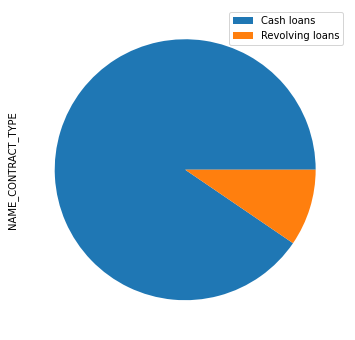

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64


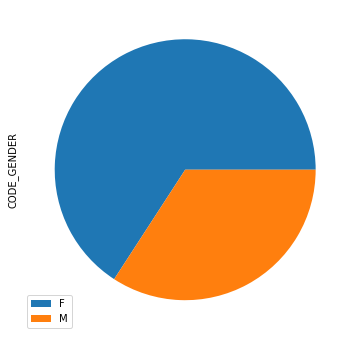

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


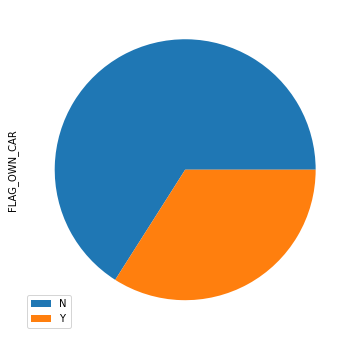

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


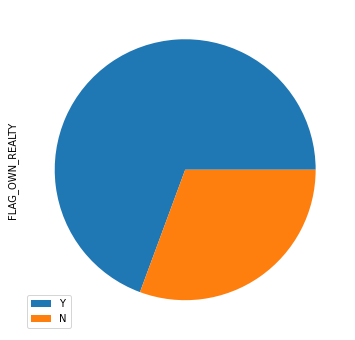

Unaccompanied      0.808186
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
NaN                0.004201
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64


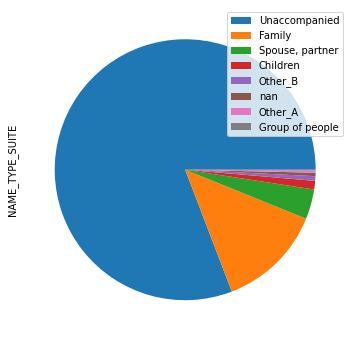

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


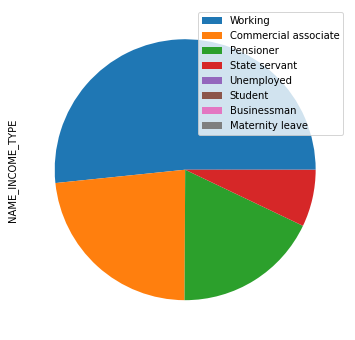

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


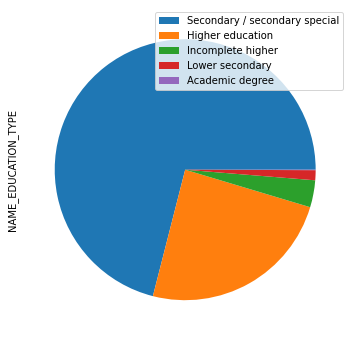

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


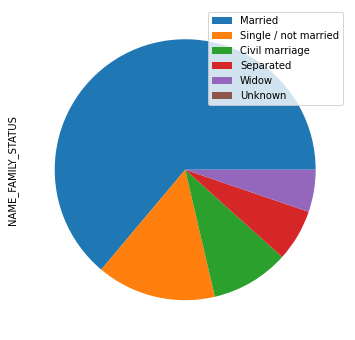

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


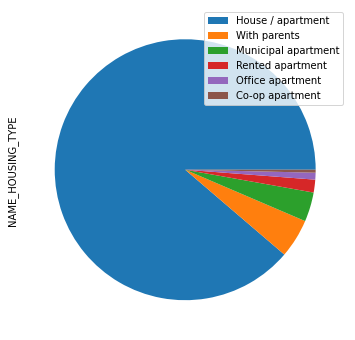

NaN                      0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64


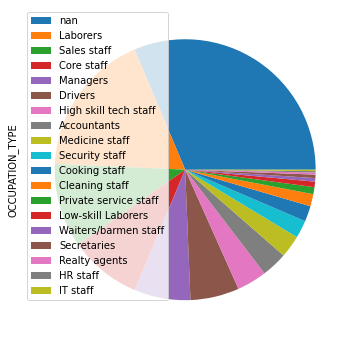

TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


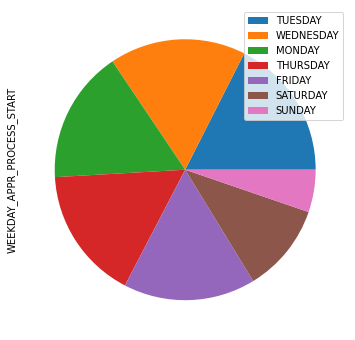

Business Entity Type 3    0.221104
NaN                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

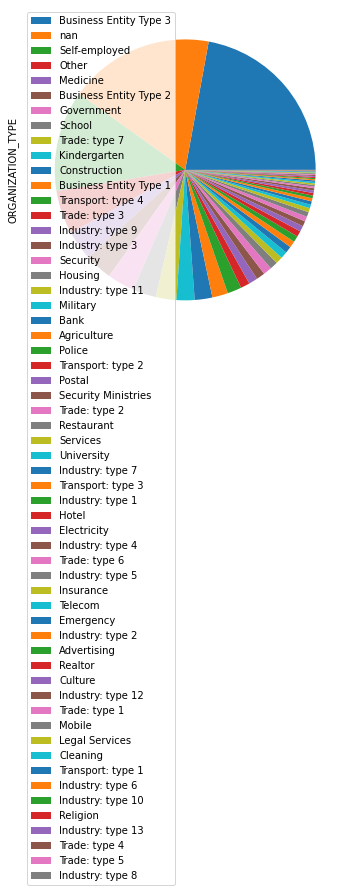

In [212]:
#Checking all object types Variables and their values

for i in appl_data.columns:
    if appl_data[i].dtypes=="object":
        print(appl_data[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        appl_data[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()

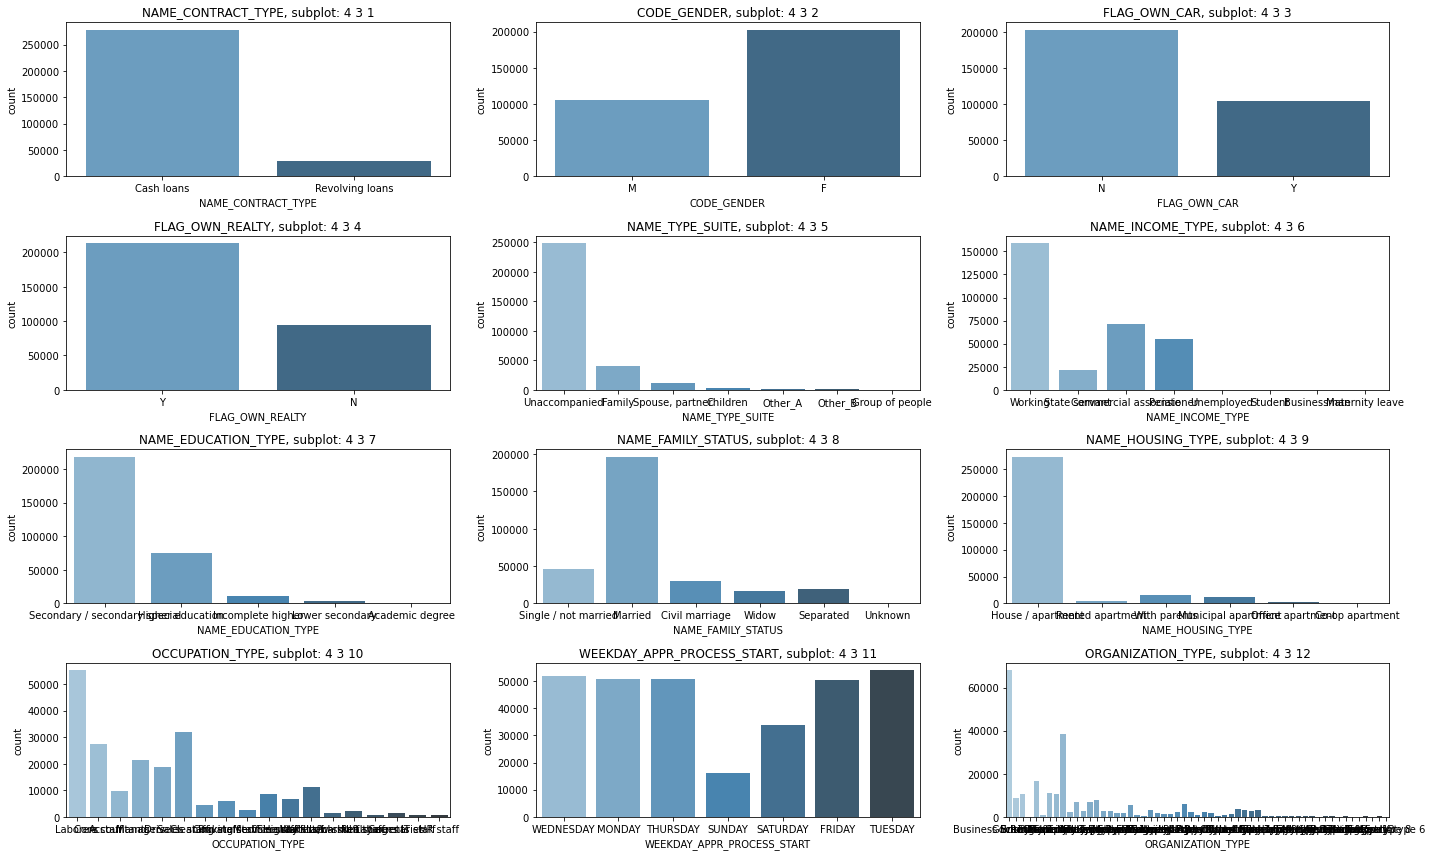

In [214]:
#  Object Data
a = 4 # number of rows
b = 3 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,12))

for i in appl_data.columns:
    if appl_data[i].dtypes=="object":

        plt.subplot(a, b, c)
        plt.title('{}, subplot: {} {} {}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.countplot(appl_data[i],palette="Blues_d")
        c = c + 1

fig.tight_layout()

plt.show()

In [215]:
appl_data['FLAG_OWN_CAR'].value_counts()


N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [216]:
appl_data['OWN_CAR_flag']=np.where(appl_data.FLAG_OWN_CAR =="Y",1,0)
appl_data['OWN_REALTY_flag']= np.where(appl_data.FLAG_OWN_REALTY =="Y",1,0)
appl_data['OWN_CAR_flag'].value_counts()

0    202924
1    104587
Name: OWN_CAR_flag, dtype: int64

In [217]:
appl_data.OWN_REALTY_flag.dtype


dtype('int32')

1.Cash loans offered are more than revolving loans, at 90%

2.65% Females have taken loans in comparison to 34% male. This is very interesting and needs to be studied further

3.65% applicant dont own cars

4.69% applicants own living quarters

5.81% applicants came accompanied for loan application
While most applicants are working class, 18% are pensioners

6.71% have secondary education

7.63% are married

8.31% have not mentioned their occupation type

# Numerical Variable:

In [218]:
appl_data.columns[appl_data.dtypes=="int64"].tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [219]:
##Deleting all the Flag columns 

for i in appl_data.columns:
    if i.startswith("FLAG"):
        appl_data.drop(columns=i, inplace=True)
        
appl_data.shape

(307511, 49)

# Standardising:
DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH cannot be -Ve numbers. Converting to absolute values

In [220]:
#Converting DAYS_BIRTH to +ve and converting days to years. Column renamed to AGE_IN_YEARS
appl_data.DAYS_BIRTH=appl_data.DAYS_BIRTH.apply(lambda x: abs(x//365.25))
appl_data.rename({'DAYS_BIRTH':'AGE_IN_YEARS'}, axis=1, inplace=True)
appl_data.info


<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0           100002       1         Cash loans           M             0   
1           100003       0         Cash loans           F             0   
2           100004       0    Revolving loans           M             0   
3           100006       0         Cash loans           F             0   
4           100007       0         Cash loans           M             0   
...            ...     ...                ...         ...           ...   
307506      456251       0         Cash loans           M             0   
307507      456252       0         Cash loans           F             0   
307508      456253       0         Cash loans           F             0   
307509      456254       1         Cash loans           F             0   
307510      456255       0         Cash loans           F             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE 

# Binning Columns:

In [221]:
# Binning AGE and Creating new column "AGE_GROUP"

appl_data['AGE_GROUP']= pd.cut(appl_data.AGE_IN_YEARS,bins=[15,25,35,45,55,65,75])

appl_data['AGE_GROUP'].value_counts(normalize=True)

(35, 45]    0.272413
(25, 35]    0.247168
(45, 55]    0.225885
(55, 65]    0.185320
(15, 25]    0.053361
(65, 75]    0.015853
Name: AGE_GROUP, dtype: float64

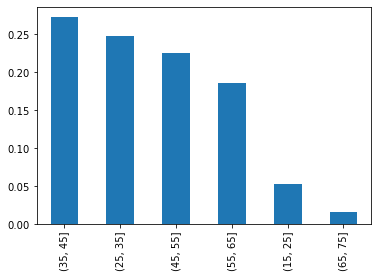

In [222]:
appl_data['AGE_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()


.35-45 age group people are the largest group of people applying for loans.

In [223]:
# Binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"

appl_data['INCOME_GROUP']= pd.qcut(appl_data['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])

appl_data['INCOME_GROUP'].value_counts(normalize=True)

Medium      0.274143
High        0.245562
Low         0.218486
VeryHigh    0.153224
VeryLow     0.108585
Name: INCOME_GROUP, dtype: float64

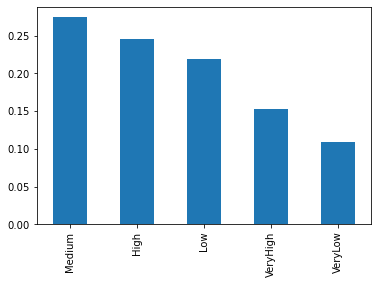

In [224]:
appl_data['INCOME_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

. Income group having medium income is largest consumer applying for loans.

# Standardization and Data Correction:

In [225]:
#DAYS_REGISTRATION, DAYS_ID_PUBLISH to +ve numbers and change to years. Columns Renamed


appl_data.DAYS_REGISTRATION = appl_data.DAYS_REGISTRATION.apply(lambda x: abs(x//365.25))
appl_data.DAYS_ID_PUBLISH = appl_data.DAYS_ID_PUBLISH.apply(lambda x: abs(x//365.25))
appl_data.rename({'DAYS_REGISTRATION':'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, axis=1, inplace=True)

In [226]:
#DAYS_LAST_PHONE_CHANGE to +ve
#DAYS_LAST_PHONE_CHANGE to +ve
appl_data.DAYS_LAST_PHONE_CHANGE = appl_data.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

In [227]:
appl_data.DAYS_EMPLOYED=appl_data.DAYS_EMPLOYED.apply(lambda x: abs(x//365.25))
appl_data.rename({'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, axis=1, inplace=True)

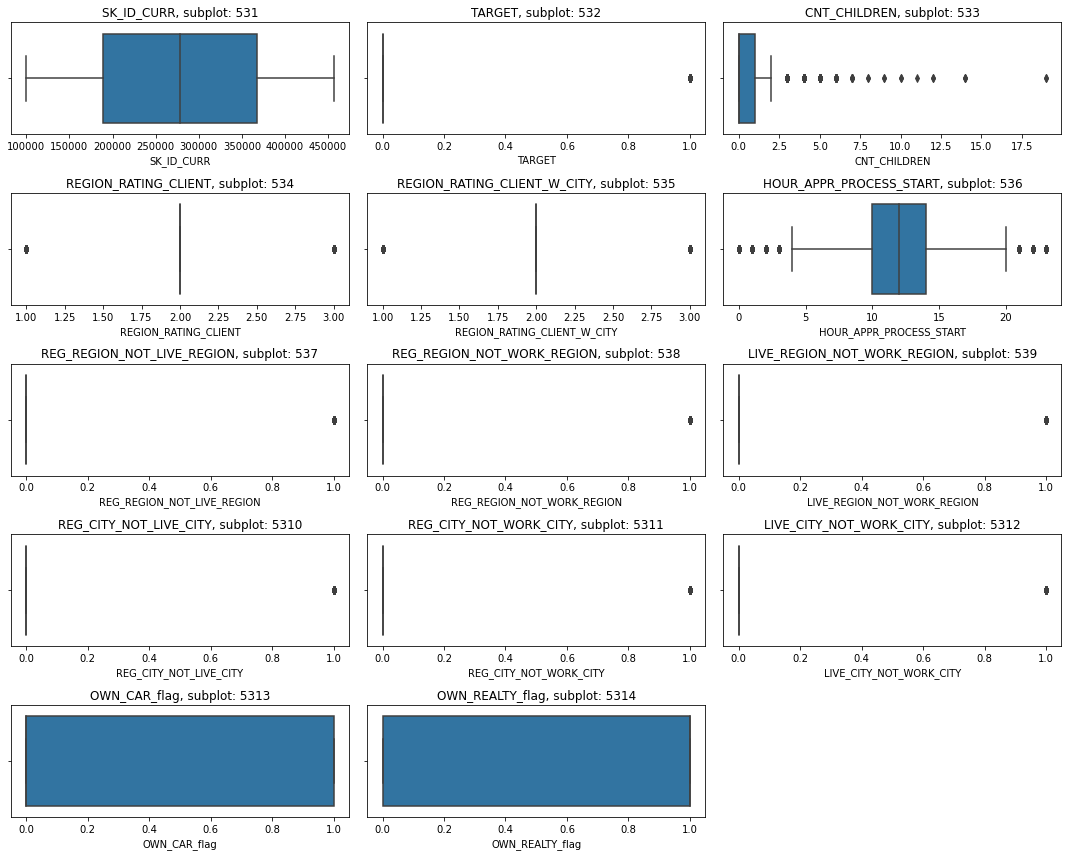

In [228]:
#Int Data analysis by box plot
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in appl_data.columns:
    if appl_data[i].dtypes=="int64" or appl_data[i].dtypes=="int32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(appl_data[i])
        c = c + 1

fig.tight_layout()
plt.show()

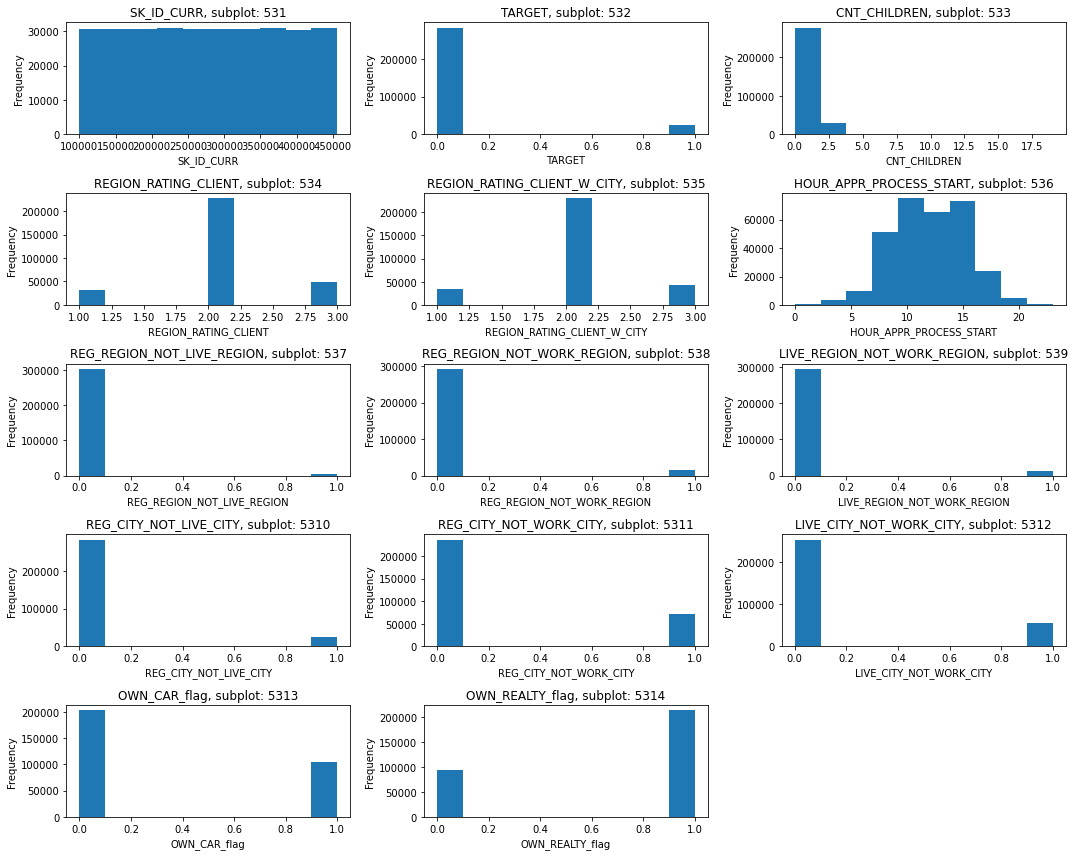

In [229]:
#Histogram type int data analysis
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in appl_data.columns:
    if appl_data[i].dtypes=="int64" or appl_data[i].dtypes=="int32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        appl_data[i].plot.hist()
        c = c + 1

fig.tight_layout()
plt.show()

CNT_CHILDREN needs to further analysed as it has outliers.


In [230]:
appl_data.CNT_CHILDREN.describe()


count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [231]:
appl_data['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

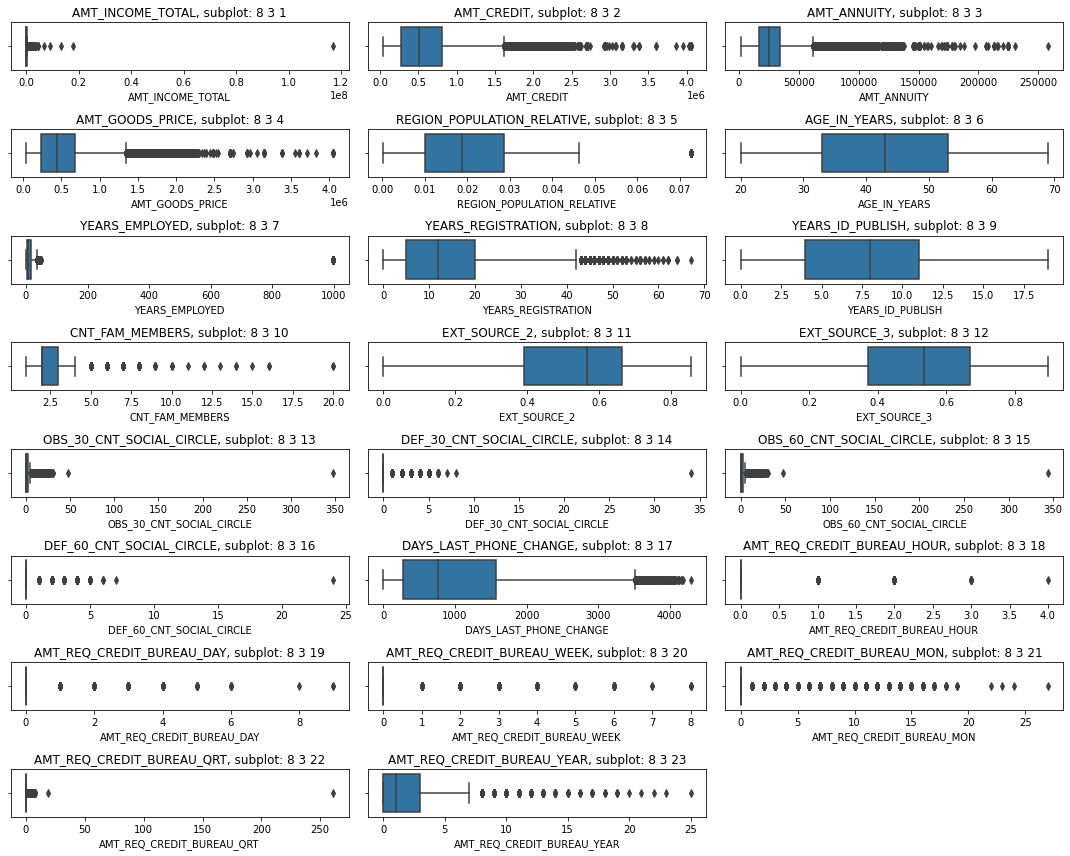

In [232]:
#  Float Data
a = 8 # number of rows
b = 3 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in appl_data.columns:
    if appl_data[i].dtypes=="float64" or appl_data[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {} {} {}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(appl_data[i])
        c = c + 1

fig.tight_layout()
plt.show()

# Finding Outliers:

following columns have outliers

'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_EMPLOYED','YEARS_REGISTRATION','OWN_CAR_AGE', DAYS_LAST_PHONE_CHANGE

In [342]:
#Columns consisting ouliers value count check
outlier_col=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_EMPLOYED','YEARS_REGISTRATION','DAYS_LAST_PHONE_CHANGE']

for i in outlier_col:
    print("\n")
 
    print(appl_data[i].describe())
    print("\n")
 
    print(appl_data[i].value_counts( dropna=False, normalize=True))
    print("\n")



count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


135000.0    0.116256
112500.0    0.100871
157500.0    0.086358
180000.0    0.080384
90000.0     0.073113
              ...   
117324.0    0.000003
64584.0     0.000003
142897.5    0.000003
109170.0    0.000003
113062.5    0.000003
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: float64




count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


450000.0     0.031573
675000.0     0.028867
225000.0     0.026542
180000.0     0.023876
270000.0     0.023547
               ...   
487318.5     0.000003
630400.5     0.000003
1875276.0    0.000003
1395895.5    0.000003
1391130.0    0.000003
Name: AMT_CREDIT, Length: 5603, dtype: f

In [343]:
#Finding outliers >97%
for i in outlier_col:
    print( i, ":", end= " ")
    print(appl_data.iloc[np.where(np.abs(ss.zscore(appl_data[i])>2))].shape)

AMT_INCOME_TOTAL : (1438, 51)
AMT_CREDIT : (12999, 51)
AMT_ANNUITY : (0, 51)
AMT_GOODS_PRICE : (0, 51)
YEARS_EMPLOYED : (55374, 51)
YEARS_REGISTRATION : (11203, 51)
DAYS_LAST_PHONE_CHANGE : (0, 51)


In [344]:
# Creating list with names of categorical nominal , numerical and categorical oridnal variables. This is being done to make codes lesser repeatitive
obj_varList=[]
num_varList=[]
for i in appl_data.columns:
    if appl_data[i].dtypes=="object":
        obj_varList.append(i)
    else:
        num_varList.append(i)

cat_varList=[]
for i in num_varList:
    if len(appl_data[i].unique())<4:
        appl_data[i].astype("category")
        cat_varList.append(i)   

In [345]:
for i in cat_varList:
    num_varList.remove(i)

print("Numercial Columns :", num_varList) 
print("\n")

print("obj Columns :", obj_varList) 
print("\n")

print("cat Columns :", cat_varList) 

Numercial Columns : ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AGE_GROUP', 'INCOME_GROUP']


obj Columns : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


cat Columns : ['TARGET', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'R

In [346]:
# Removing income group and age group as these have binned data. Code_gender and Target are ordinal and hence move to differnt list
num_varList.remove('INCOME_GROUP')
num_varList.remove('AGE_GROUP')
num_varList.remove('SK_ID_CURR')
obj_varList.remove('CODE_GENDER')

cat_varList.append('CODE_GENDER')

cat_varList.remove('TARGET')

print("Numercial Columns :", num_varList) 
print("\n")

print("obj Columns :", obj_varList) 
print("\n")

print("cat Columns :", cat_varList) 

Numercial Columns : ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE']


obj Columns : ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


cat Columns : ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGI

# Dividing Dataframe as Target:

Target var 1- clients with payment difficulties.

Target var 0- clients with no payment difficulties.

In [337]:
Target_0=appl_data[appl_data['TARGET']==0]
Target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   
5           99000.0    490495.5      27517.5         454500.0   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1           Family    State servant               Higher education   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4    Unaccompanied          Working  Secondary / secondary special   
5  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   

   AGE_IN_YEARS  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
1          45.0             3.0                 3.0               0.0   
2          52.0             0.0                11.0               6.0   
3          52.0             8.0                26.0               6.0   
4          54.0             8.0                11.0               9.0   
5          46.0             4.0                13.0               1.0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   
5        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   
5                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   
5                       0                     

In [336]:
Target_1=appl_data[appl_data['TARGET']==1]
Target_1.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0       100002       1         Cash loans           M             0   
26      100031       1         Cash loans           F             0   
40      100047       1         Cash loans           M             0   
42      100049       1         Cash loans           F             0   
81      100096       1         Cash loans           F             0   

    AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           202500.0    406597.5      24700.5         351000.0   
26          112500.0    979992.0      27076.5         702000.0   
40          202500.0   1193580.0      35028.0         855000.0   
42          135000.0    288873.0      16258.5         238500.0   
81           81000.0    252000.0      14593.5         252000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
26   Unaccompanied               Working  Secondary / secondary special   
40   Unaccompanied  Commercial associate  Secondary / secondary special   
42   Unaccompanied               Working  Secondary / secondary special   
81   Unaccompanied             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
81               Married  House / apartment                    0.028663   

    AGE_IN_YEARS  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0           25.0             1.0                 9.0               5.0   
26          51.0             7.0                17.0               5.0   
40          47.0             3.0                 3.0               2.0   
42          36.0             9.0                 0.0              12.0   
81          67.0           999.0                14.0              11.0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0         Laborers              1.0                     2   
26   Cooking staff              1.0                     3   
40        Laborers              2.0                     2   
42     Sales staff              2.0                     3   
81             NaN              2.0                     2   

    REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                             2                  WEDNESDAY   
26                            2                     MONDAY   
40                            2                    TUESDAY   
42                            3                   THURSDAY   
81                            2                   THURSDAY   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                        0                       0                        0   
26                       0                       0                        0   
40                       0                       0                        0   
42                       0                 

# Uniavariate Categorical Nominal Analysis on both Target dataframes:

Graph for :  NAME_CONTRACT_TYPE


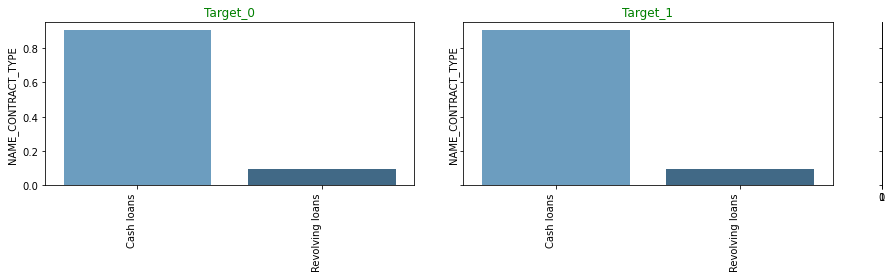

Graph for :  NAME_TYPE_SUITE


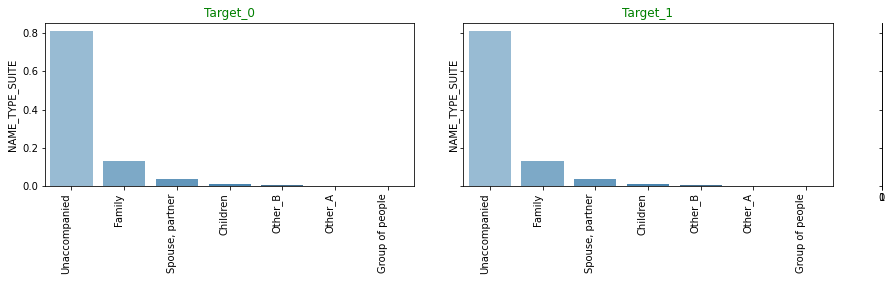

Graph for :  NAME_INCOME_TYPE


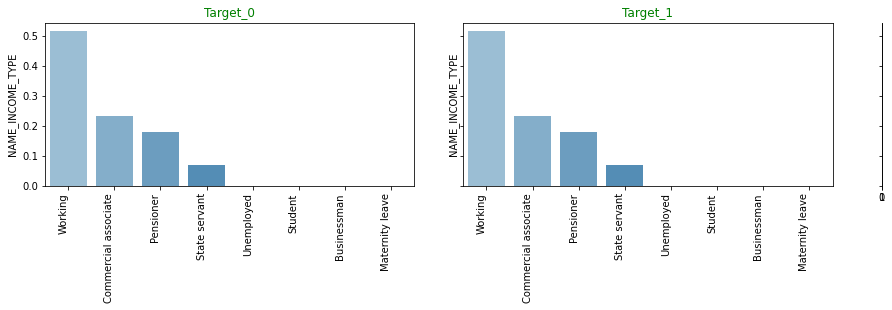

Graph for :  NAME_EDUCATION_TYPE


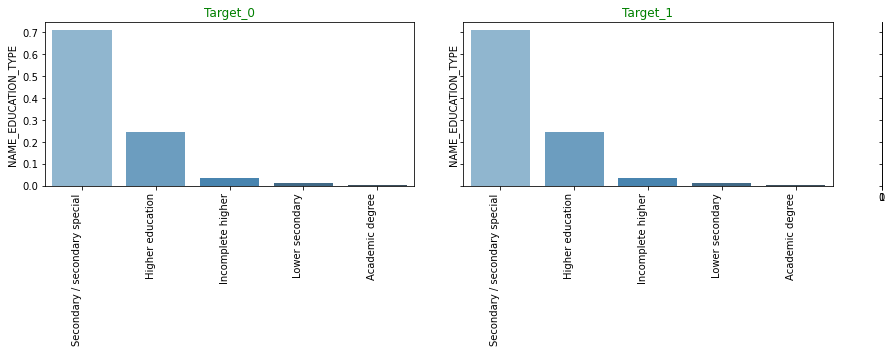

Graph for :  NAME_FAMILY_STATUS


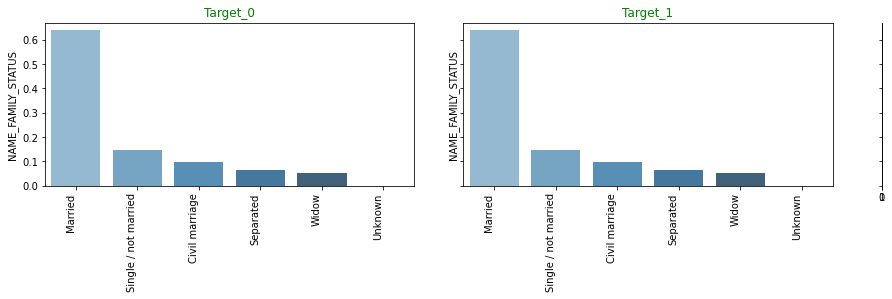

Graph for :  NAME_HOUSING_TYPE


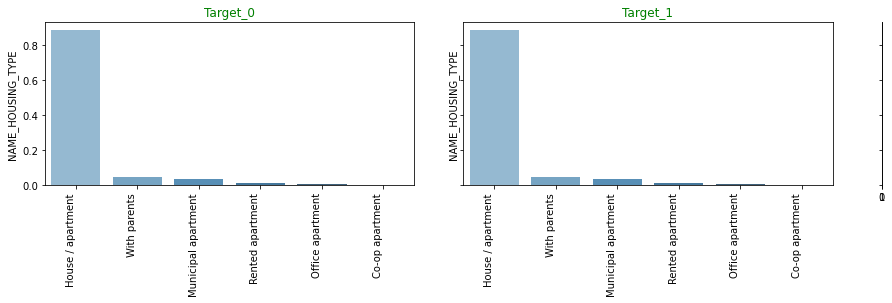

Graph for :  OCCUPATION_TYPE


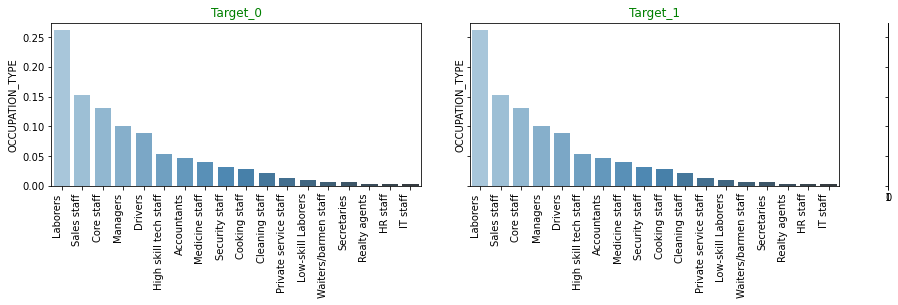

Graph for :  WEEKDAY_APPR_PROCESS_START


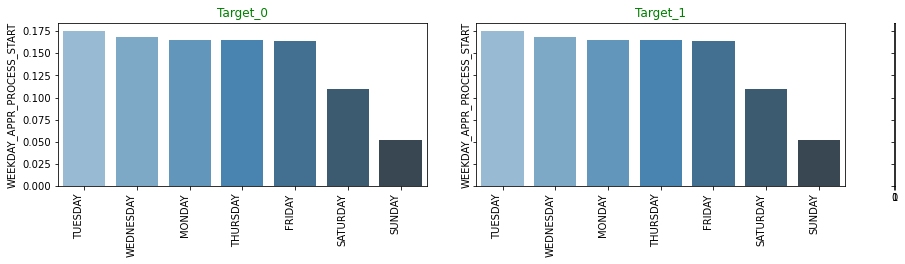

Graph for :  ORGANIZATION_TYPE


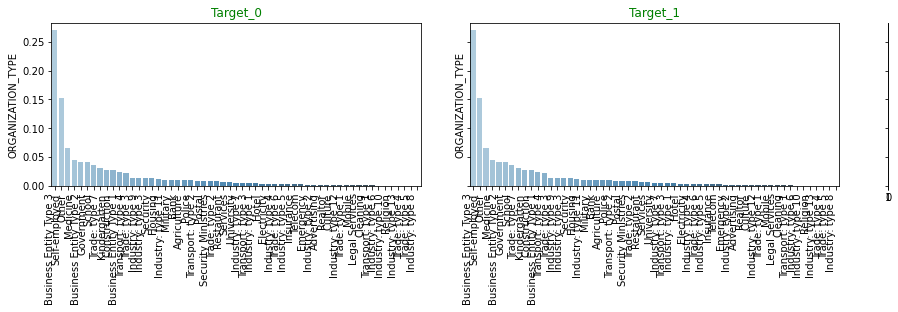

In [248]:
#Running a loop over categorical nominal variables for analysis
for i in obj_varList:
    
    cat_num_0=appl_data[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,3))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(minor=False), rotation=90, horizontalalignment='right')
    chart1.axes.set_title('Target_0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=appl_data[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')
    chart2.axes.set_title('Target_1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

1. NAME_CONTRACT TYPE- Cash Loans are large part of the company's portfolio. For Target 0 - 85% and almost 95% for Target-1  
2. NAME_TYPE_SUIT - 80-90% in Target 0 and Target 1 are applying for loan Unaccompanied. Indicating, this is not a parameter that can influence payment default. 
3. NAME_INCOME_TYPE - 50% working in case of Target 0 and 60% in case of Target 1 are working income types. 
4. NAME_EDUCATION_TYPE - In both Target 0 and 1, applicants with Secondary Education has applied for loans more than others.90% of defaulting payments are from applicants with secondary income. Needs further analysis 
5. NAME_FAMILY_STATUS - Married applicants - almost 60% have defaulted on payments 
6. NAME_HOSUING_TYPE -85-90% in Target 0 and Target 1 applicants are staying in "House/apartment". Indicating, this is not a parameter that can influence payment default. 
7. OCCUPATION_TYPE - Labourers, sales staff, core staff, drivers constitute of 50% of defaulters. Labourers is the highest percentage of applicants too. 
8. ORGANIZATION_TYPE - Business ENTITY TYPE 3 AND SELF EMPLOYED add upto 40% defaulters. The highest % of loan takers are also this category. 

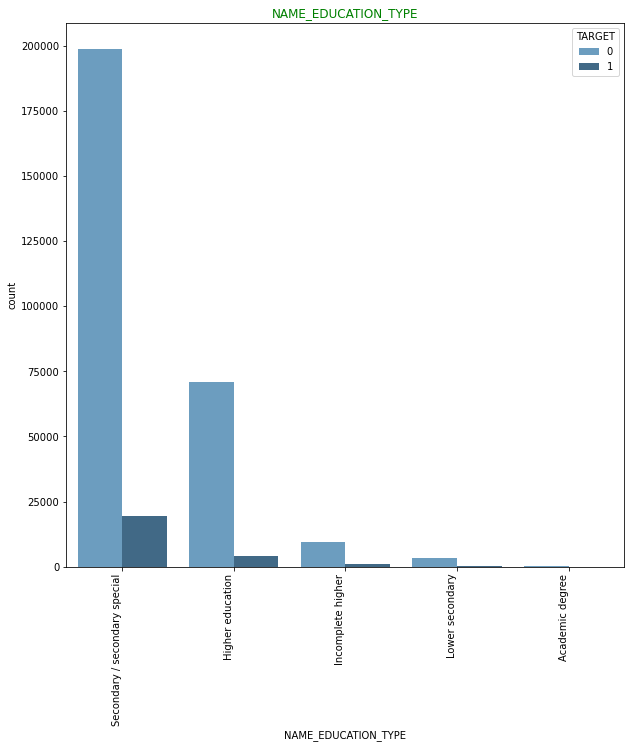

In [249]:
plt.figure(figsize=(10,10))

chart=sns.countplot(x='NAME_EDUCATION_TYPE', data=appl_data, hue="TARGET", palette="Blues_d")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.axes.set_title('NAME_EDUCATION_TYPE',fontsize= 12,fontweight= 7,color='Green')
plt.show()

Unbalanced data, difficult for analysis as seen above.

# Univariate Analysis on Categorical Ordered:

Graph for :  REGION_RATING_CLIENT


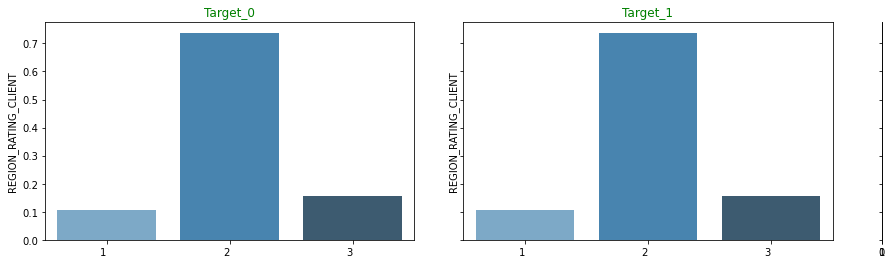

Graph for :  REGION_RATING_CLIENT_W_CITY


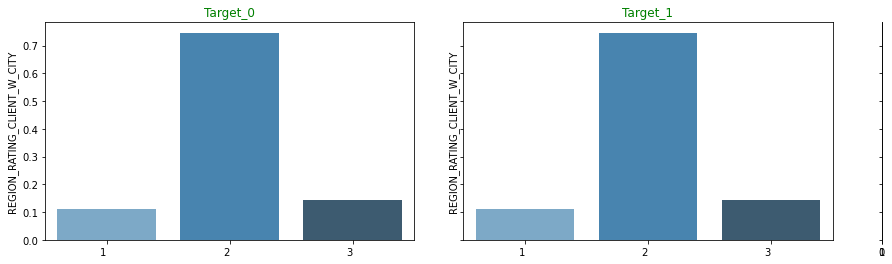

Graph for :  REG_REGION_NOT_LIVE_REGION


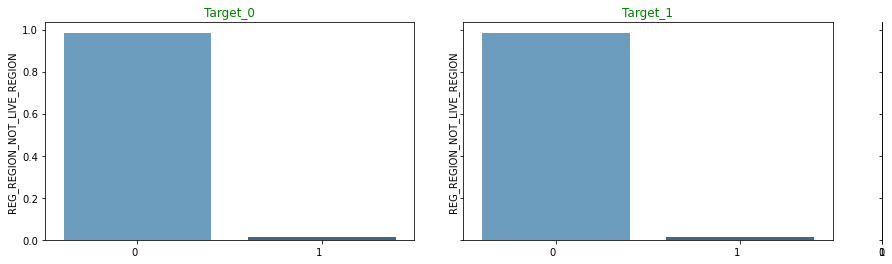

Graph for :  REG_REGION_NOT_WORK_REGION


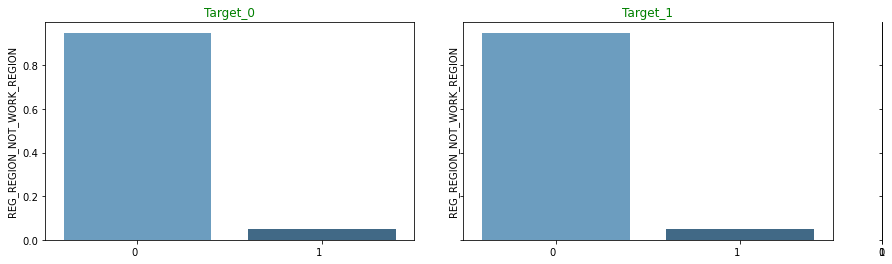

Graph for :  LIVE_REGION_NOT_WORK_REGION


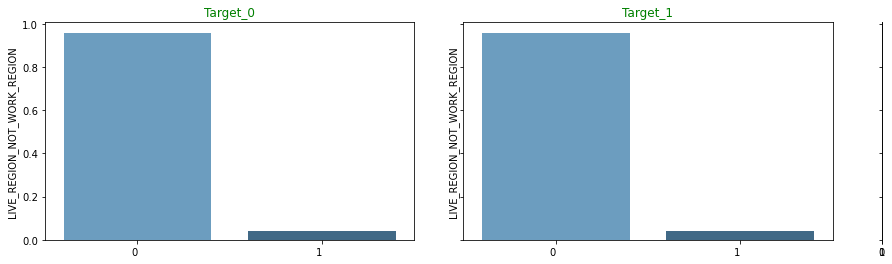

Graph for :  REG_CITY_NOT_LIVE_CITY


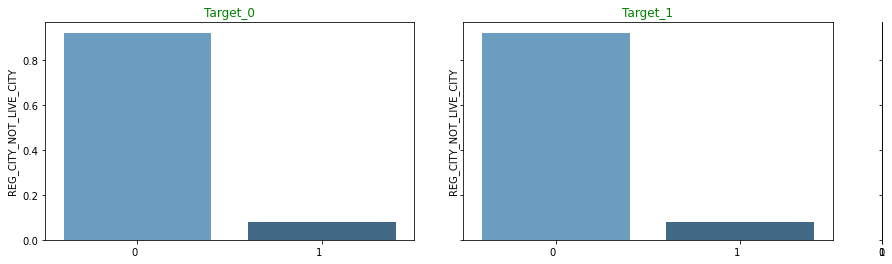

Graph for :  REG_CITY_NOT_WORK_CITY


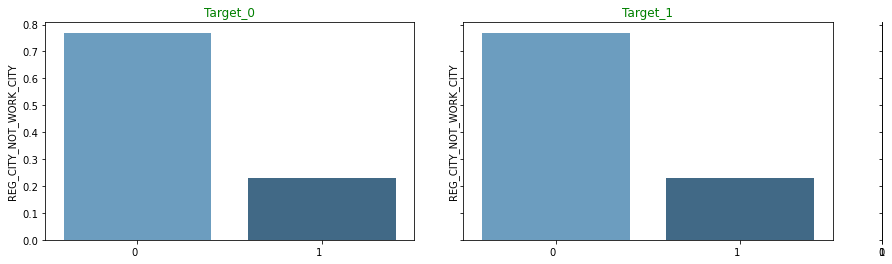

Graph for :  LIVE_CITY_NOT_WORK_CITY


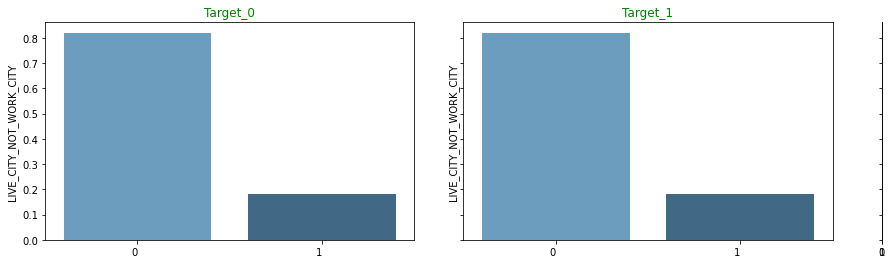

Graph for :  OWN_CAR_flag


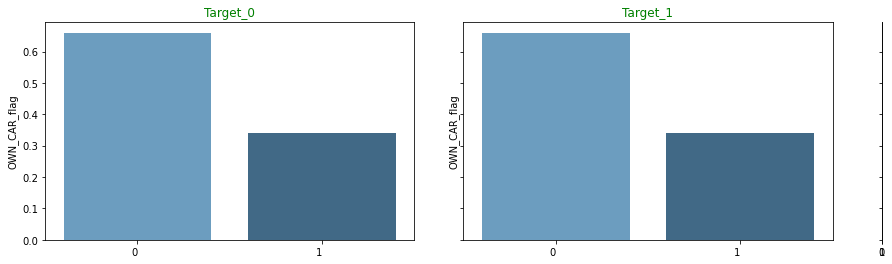

Graph for :  OWN_REALTY_flag


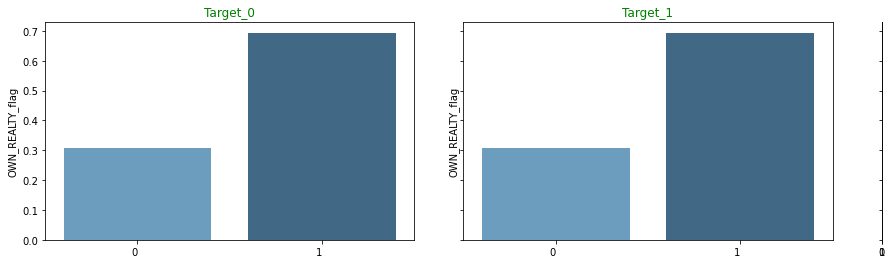

Graph for :  CODE_GENDER


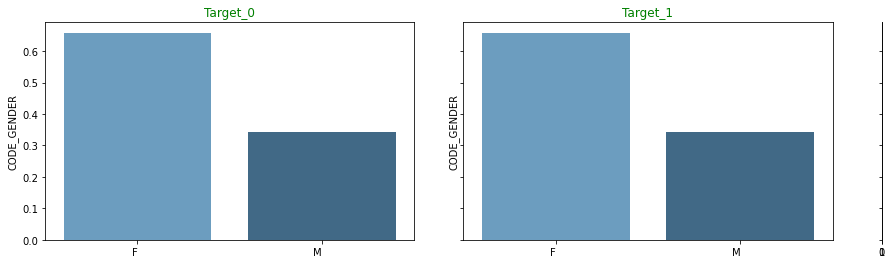

In [250]:
for i in cat_varList:
    cat_num_0=appl_data[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1,palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(), horizontalalignment='right')
    chart1.axes.set_title('Target_0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=appl_data[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2,palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), horizontalalignment='right')
    chart2.axes.set_title('Target_1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

1. REGION_RATING_CLIENT'& 'REGION_RATING_CLIENT_W_CITY'- Region 2 has the highest % applicants both in TARGET 0 and Target 1.

2. REG_REGION_NOT_LIVE_REGION, REGION_NOT_WORK_REGION, VE_REGION_NOT_WORK_REGION'- For both Target 0 and Target 1 out of Region, ie 1 is very low and does not seem to affect the default rate.

3. REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY - Default ratio is higher for 1, ie different from permanent address.  

4. 'CODE_GENDER' - Ratio of F to M in Target 0 is 2.3 and F to M in Target 0 - 1.3. indicatign that MEN are defaulting more than Women.

# Univariate Analysis on Continuous Variable:

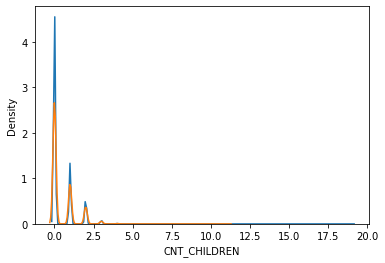

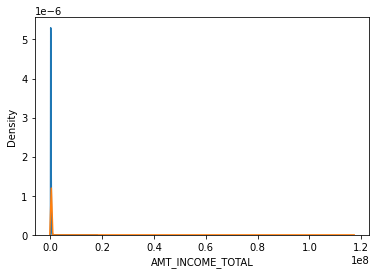

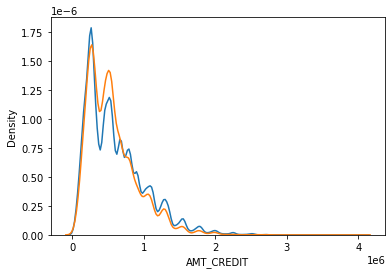

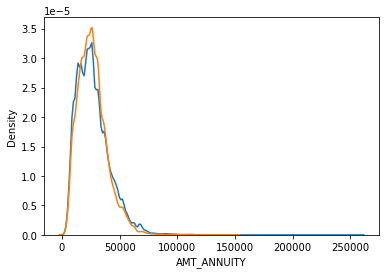

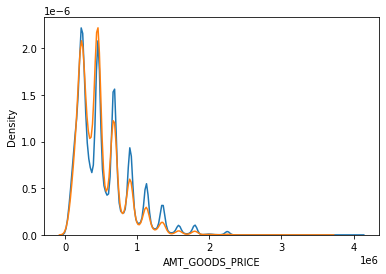

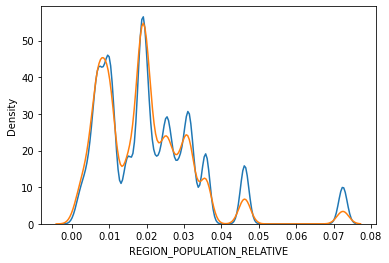

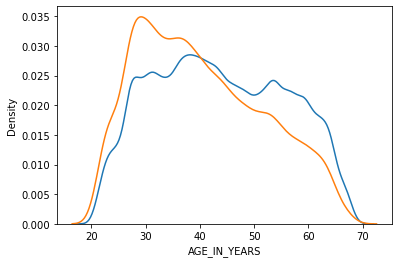

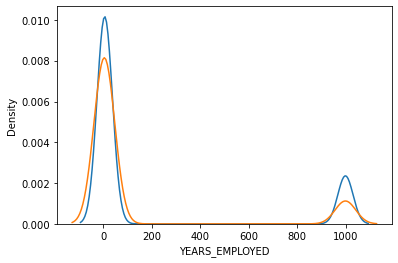

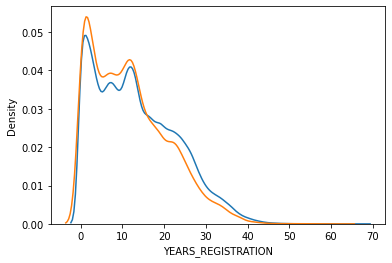

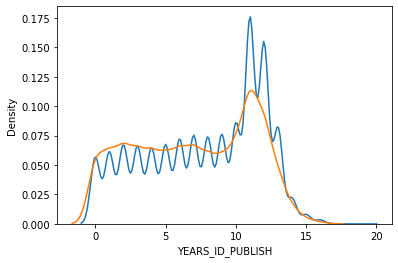

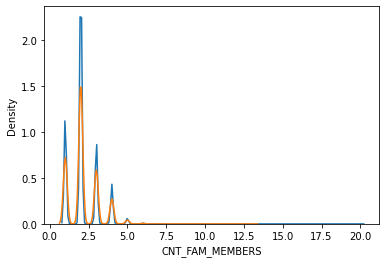

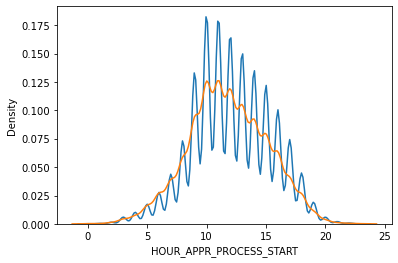

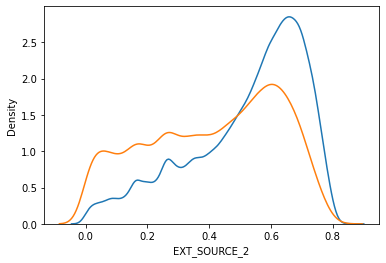

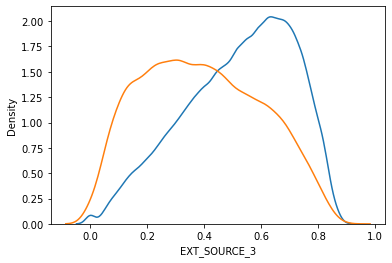

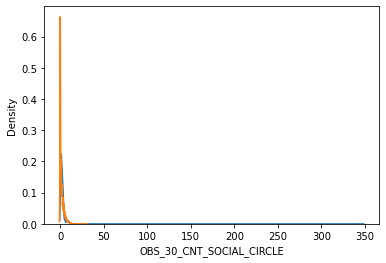

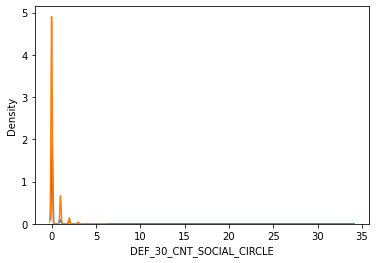

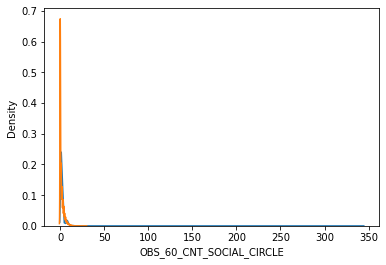

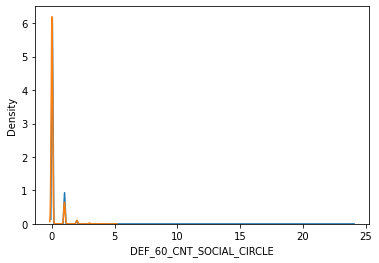

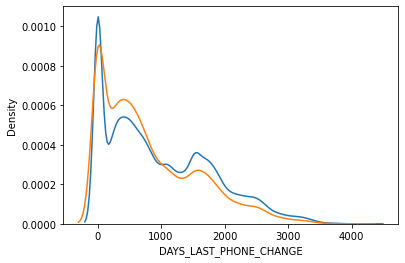

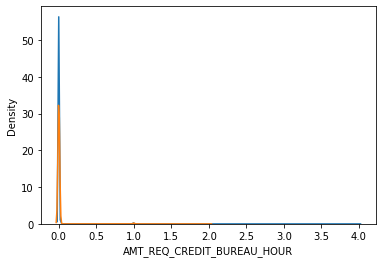

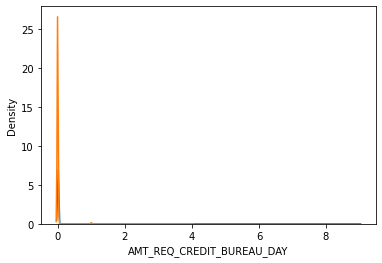

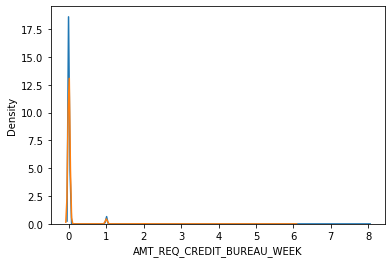

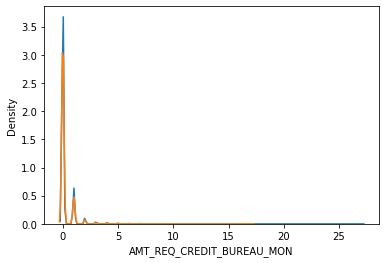

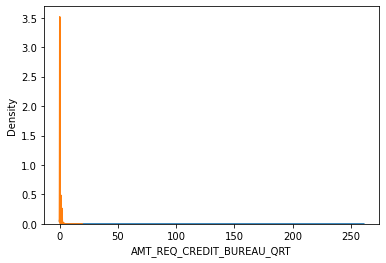

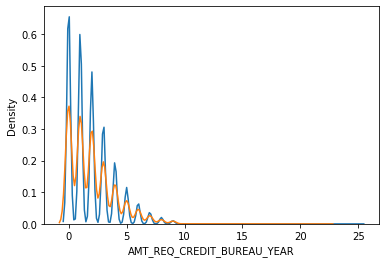

ValueError: could not convert string to float: '250000-275000'

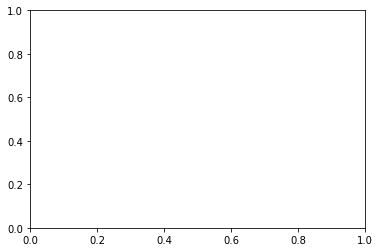

In [251]:
for i in num_varList:
    sns.distplot(Target_0[i], hist = False, label = 'No Default')
    sns.distplot(Target_1[i], hist = False, label = 'Payment difficulty')
    plt.show()

Graph for :  CNT_CHILDREN


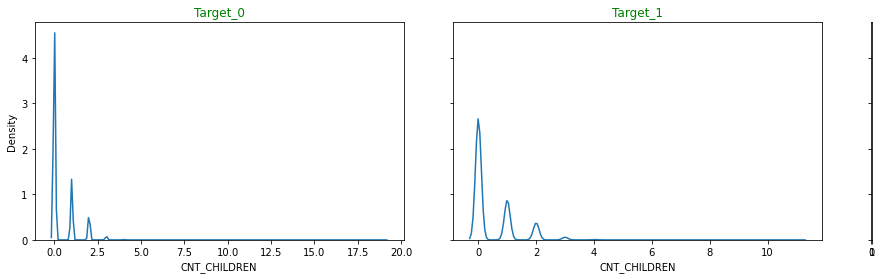

Graph for :  AMT_INCOME_TOTAL


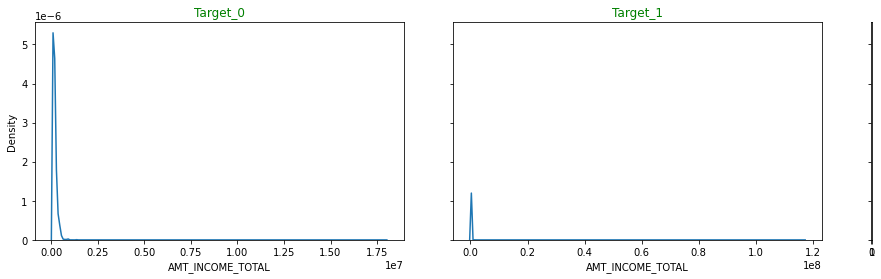

Graph for :  AMT_CREDIT


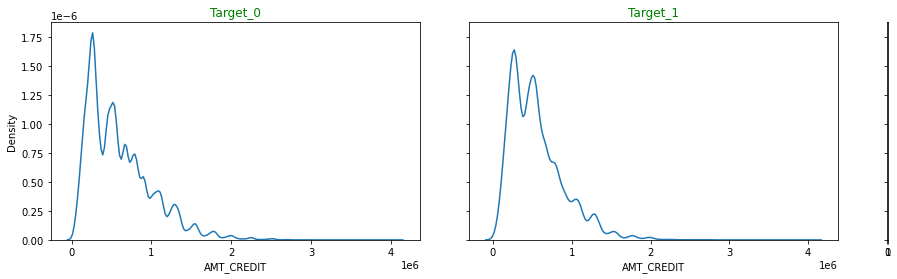

Graph for :  AMT_ANNUITY


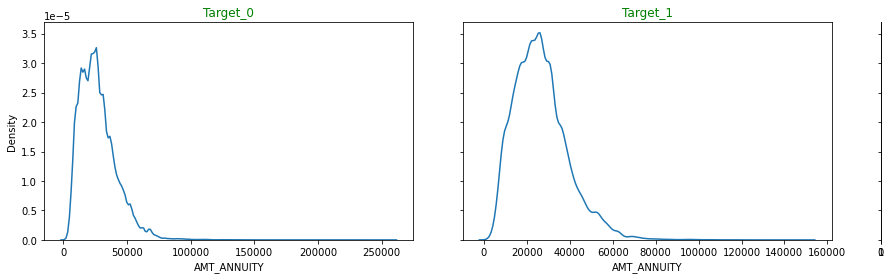

Graph for :  AMT_GOODS_PRICE


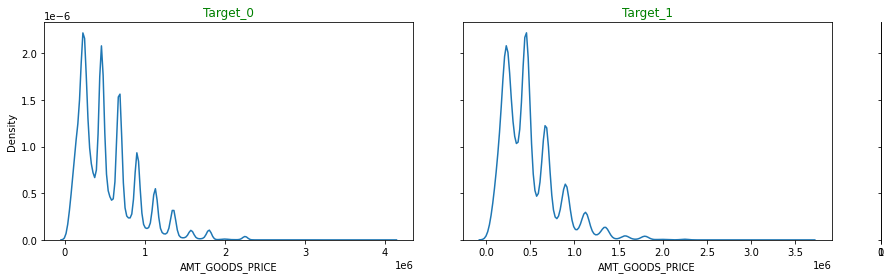

Graph for :  REGION_POPULATION_RELATIVE


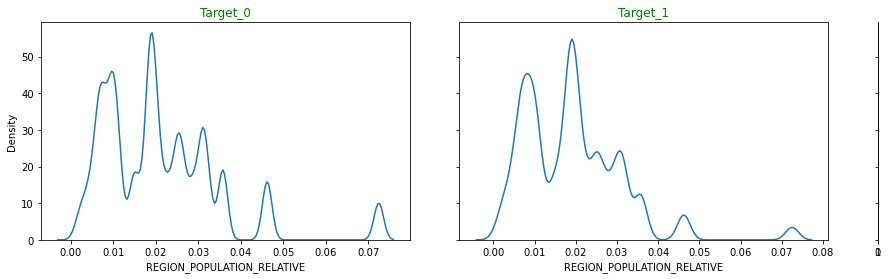

Graph for :  AGE_IN_YEARS


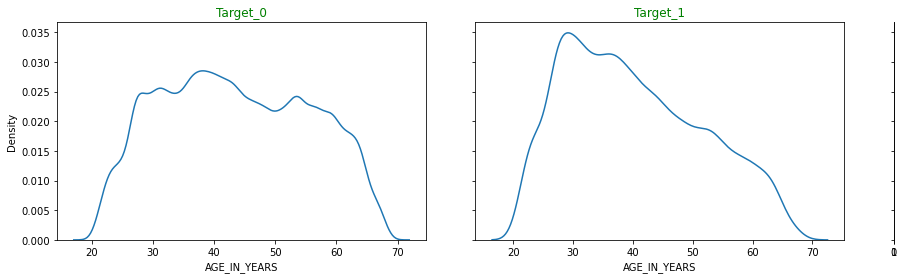

Graph for :  YEARS_EMPLOYED


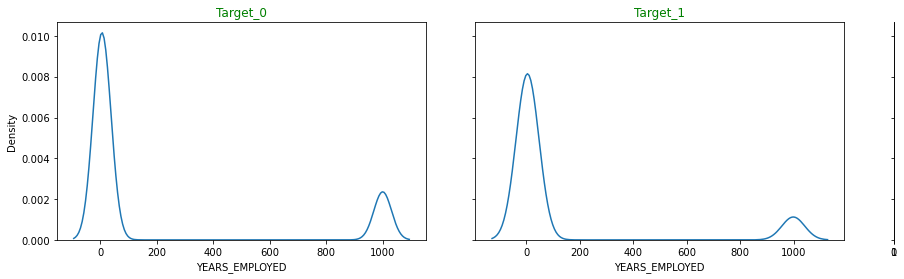

Graph for :  YEARS_REGISTRATION


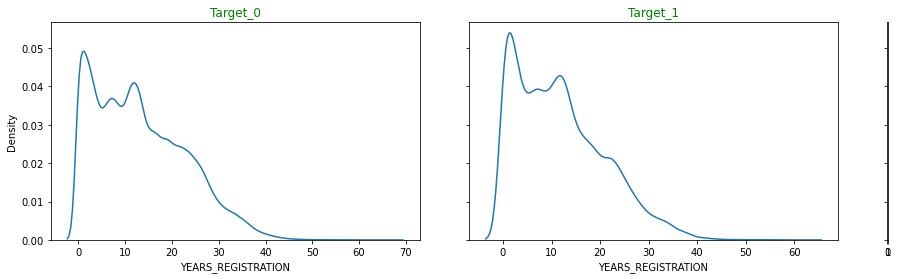

Graph for :  YEARS_ID_PUBLISH


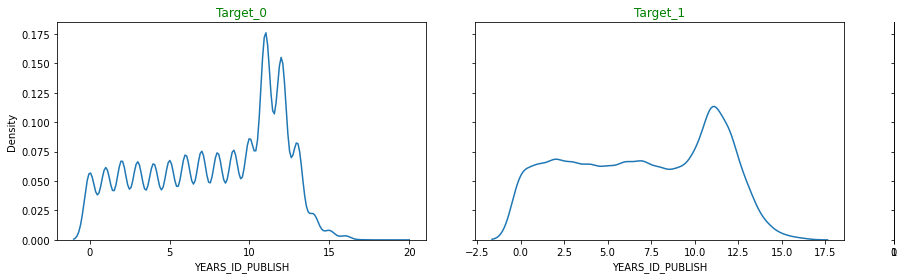

Graph for :  CNT_FAM_MEMBERS


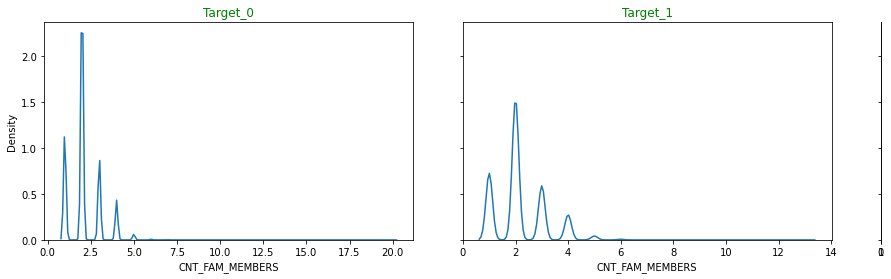

Graph for :  HOUR_APPR_PROCESS_START


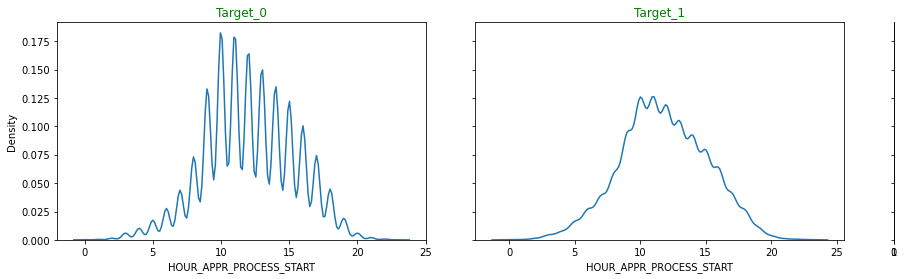

Graph for :  EXT_SOURCE_2


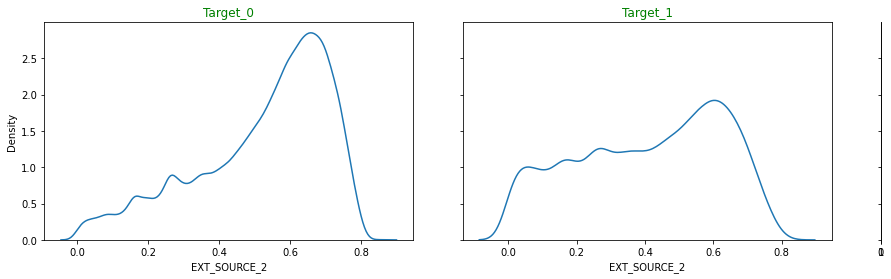

Graph for :  EXT_SOURCE_3


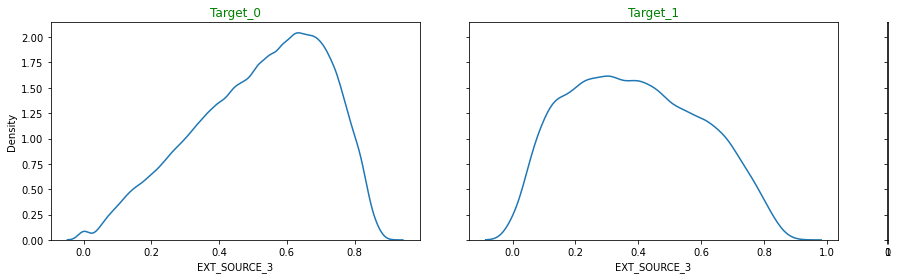

Graph for :  OBS_30_CNT_SOCIAL_CIRCLE


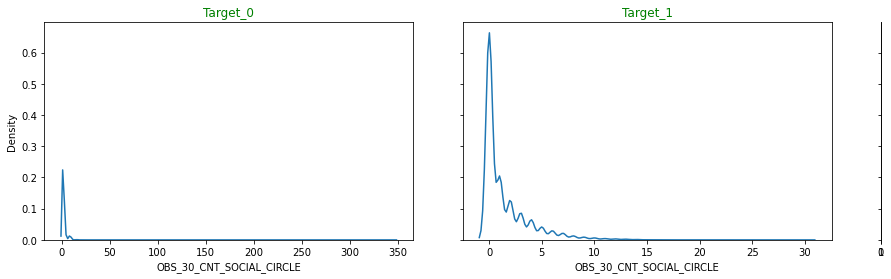

Graph for :  DEF_30_CNT_SOCIAL_CIRCLE


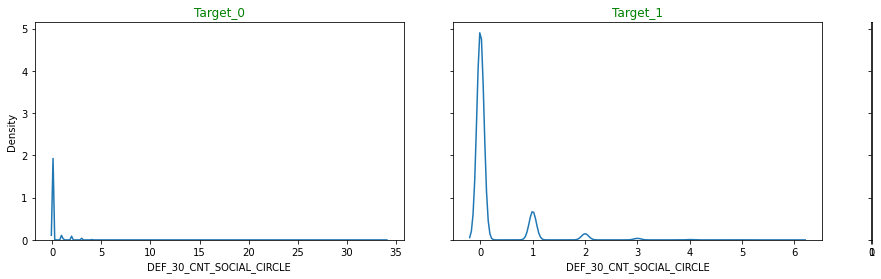

Graph for :  OBS_60_CNT_SOCIAL_CIRCLE


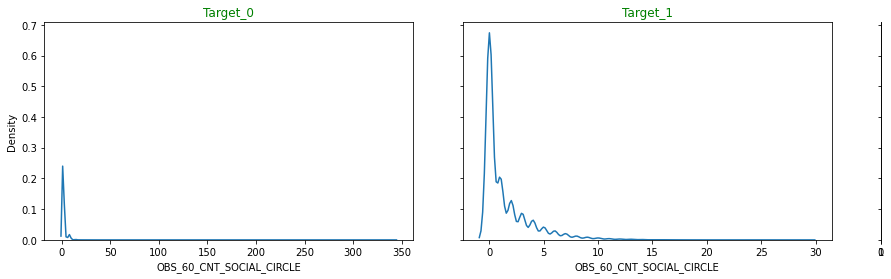

Graph for :  DEF_60_CNT_SOCIAL_CIRCLE


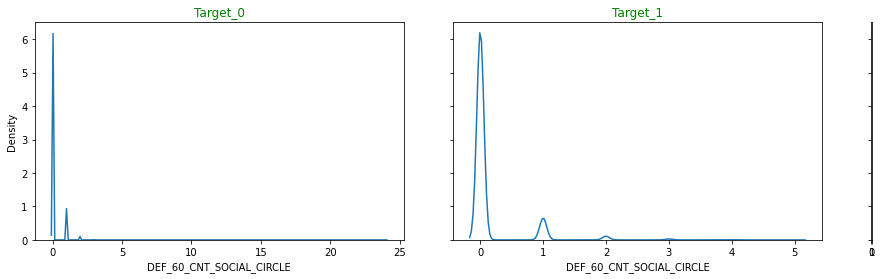

Graph for :  DAYS_LAST_PHONE_CHANGE


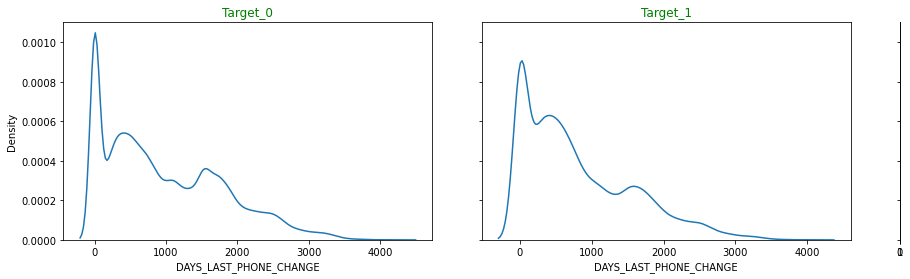

Graph for :  AMT_REQ_CREDIT_BUREAU_HOUR


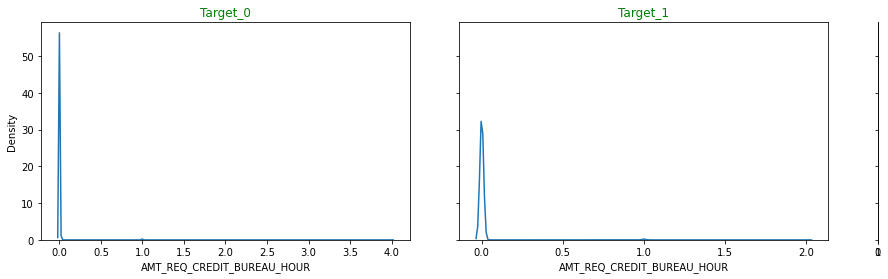

Graph for :  AMT_REQ_CREDIT_BUREAU_DAY


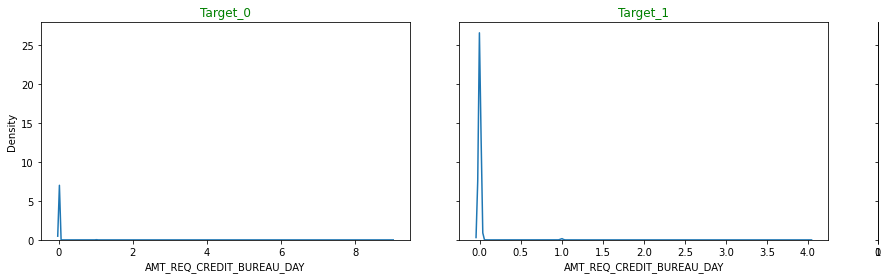

Graph for :  AMT_REQ_CREDIT_BUREAU_WEEK


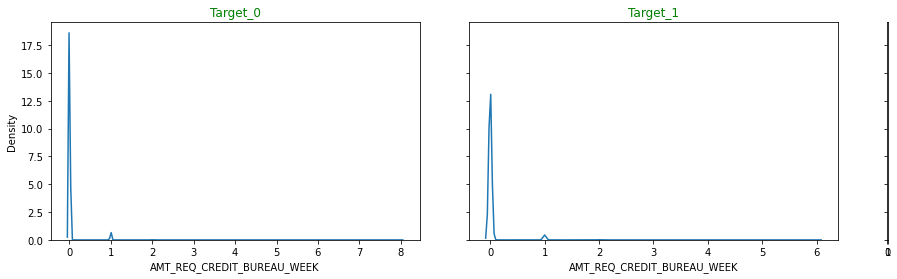

Graph for :  AMT_REQ_CREDIT_BUREAU_MON


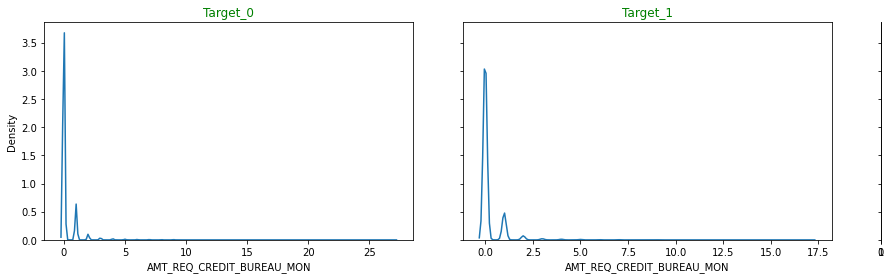

Graph for :  AMT_REQ_CREDIT_BUREAU_QRT


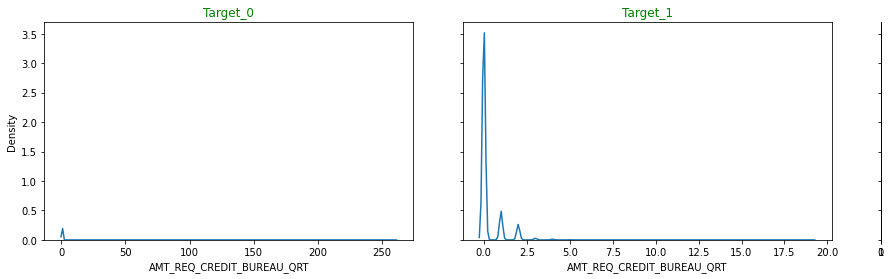

Graph for :  AMT_REQ_CREDIT_BUREAU_YEAR


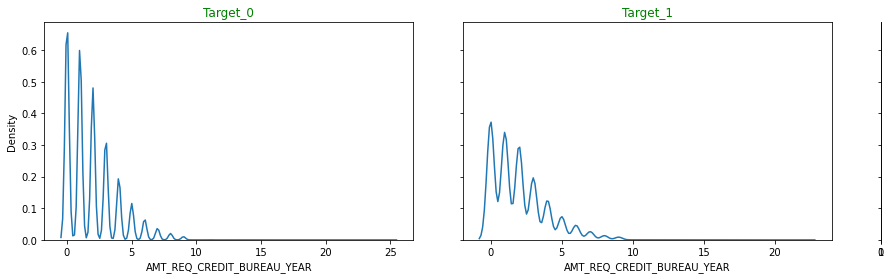

Graph for :  AMT_INCOME_RANGE


ValueError: could not convert string to float: '250000-275000'

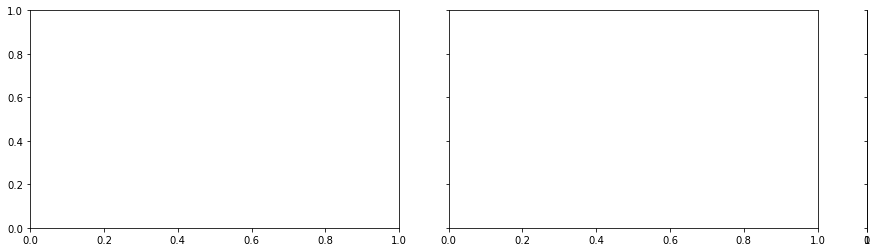

In [347]:
#For more CLARITY plotting on separate graph
for i in num_varList:
    cat_num_0=Target_0[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print("Graph for : ",i)
    
    chart1=sns.distplot(Target_0[i], ax=ax1,hist = False)
    chart1.axes.set_title('Target_0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=Target_1[i].value_counts()
    chart2=sns.distplot(a=Target_1[i],ax=ax2,hist = False)
    chart2.axes.set_title('Target_1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

1. AMT_CREDIT - Appears lower for Target 1, which is a good sign as lesser default loss to the company.

2. AGE_IN_YEARS Density of 30 years in Target 1 larger, indicating younger are defaulting more

3. YEARS_EMPLOYED has large no of rows of incorrect data and hence the data representation is incorrect

4. Lesser no of Target 1 OWN cars
5. EXT_SOURCE_2 is clearing showing that TARGET 0 has higher densiy of higher scores
6. OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE - Very clearly visible that for Target 1, 30 DPD and 60 DPD observed in social surroundign is higher.
7. DAYS_LAST_PHONE_CHANGE- More people from the Target 1 have changed their phone earlier than Target 1. Indicating intention issues in repaying loan
8. AMT_REQ_CREDIT_BUREAU_YEAR, month, week, hour - has lesser Target 1 at 0 hits. This could indicate they are looking getting loans from various financial companies

Graph for :  AGE_GROUP


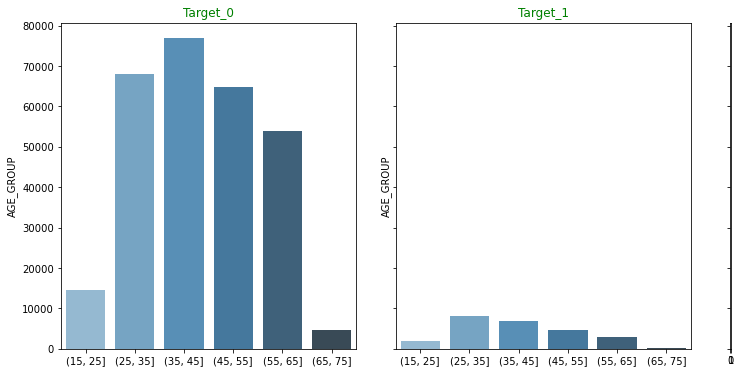

Graph for :  INCOME_GROUP


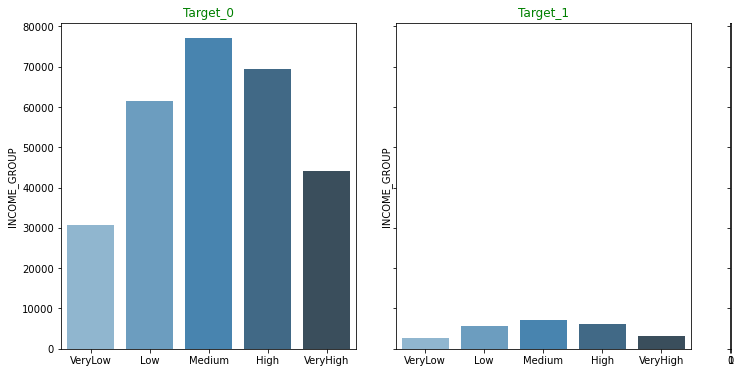

In [254]:
#Plotting Age_Group and Income_Group 

binList=["AGE_GROUP", "INCOME_GROUP"]
for i in binList:

    cat_num_0=Target_0[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(12,6))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(), horizontalalignment='center')
    chart1.axes.set_title('Target_0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=Target_1[i].value_counts()
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), horizontalalignment='center')
    chart2.axes.set_title('Target_1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

1. AGE_GROPUP - 35-45 are more in Target_0 0. In Target_1- 25-25 have higher share. Age seems like influencing defaulters.
2. INCOME_GROUP - Medium income group have more count in Target_0 and Target_1

# Bivariate Analysis on categorical and Continuous Variable:


Categorical and Continuous Variable

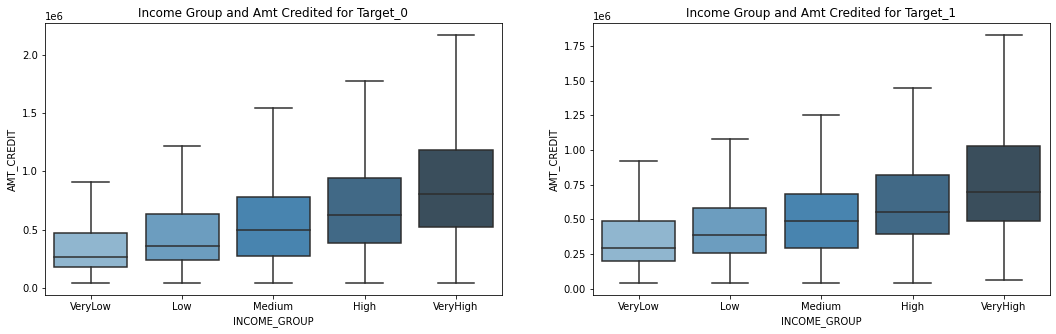

In [255]:
# INCOME_GROUP vs AMT_CREDIT for both data frames

plt.figure(figsize = (18,5)) 

plt.subplot(1,2,1)
plt.title("Income Group and Amt Credited for Target_0")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = Target_0, showfliers=False, palette="Blues_d")

plt.subplot(1,2,2)
plt.title("Income Group and Amt Credited for Target_1")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = Target_1, showfliers=False, palette="Blues_d")
plt.show()

Looking at the data no insights can be drawn.

Applicants with Academic degree have high defaulters. But from plot, no of applicants with academic degree is minimum. 


In [256]:
#AMT_CREDIT with Gender and Income type analysis for Target_0


result=pd.pivot_table(data=Target_0, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(result,0)

CODE_GENDER                   F          M
NAME_INCOME_TYPE                          
Businessman           1125000.0  1272857.0
Commercial associate   668840.0   685304.0
Maternity leave        562500.0   765000.0
Pensioner              535162.0   571540.0
State servant          665132.0   695357.0
Student                372556.0   598753.0
Unemployed             787909.0  1045500.0
Working                577838.0   587183.0

In [257]:
#AMT_CREDIT with Gender and Income typeanalysis for Target 1


result1=pd.pivot_table(data=Target_1, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(result1,0)


CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Commercial associate  613418.0  599682.0
Maternity leave       929250.0       NaN
Pensioner             558498.0  556645.0
State servant         614062.0  616407.0
Unemployed            653250.0  546750.0
Working               537035.0  533821.0

# Categorical and Continuous Variable:

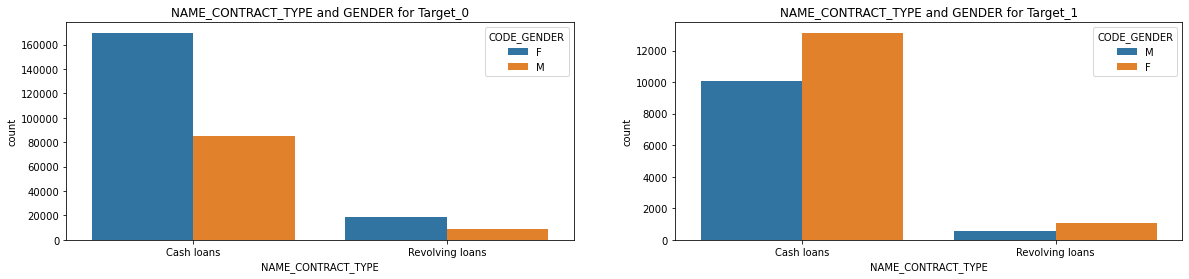

In [258]:
#Bivariate categorial and categorical

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and GENDER for Target_0")

sns.countplot('NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data =Target_0)

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and GENDER for Target_1")
sns.countplot('NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data =Target_1)

plt.show()

.We have more females as loan appplicants. although male applicants are lower, ratio of male applicants deafulting is higher.

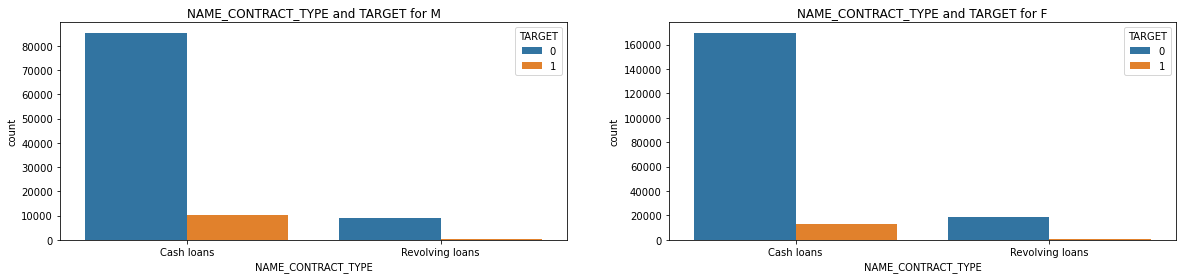

In [259]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and TARGET for M")

sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=appl_data[(appl_data['CODE_GENDER']=="M")])

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and TARGET for F")
sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=appl_data[(appl_data['CODE_GENDER']=="F")])

plt.show()

This clearly shows more defaulters are males than famale applicants .

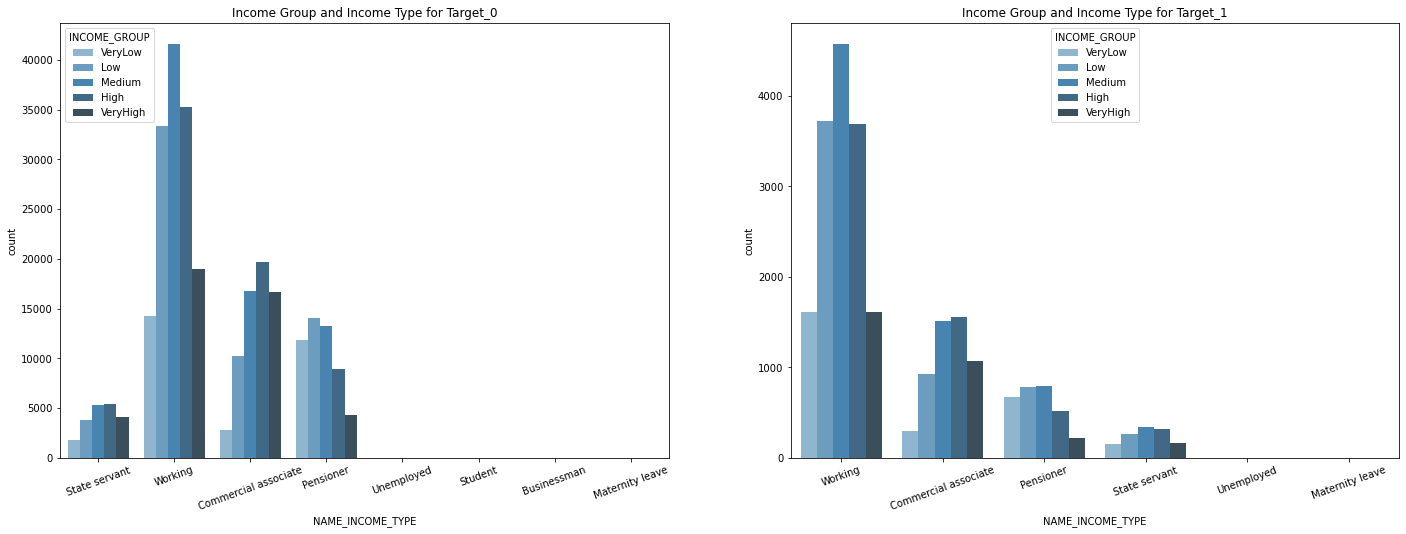

In [260]:
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
plt.title("Income Group and Income Type for Target_0")
sns.countplot('NAME_INCOME_TYPE', hue = 'INCOME_GROUP', data =Target_0, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Income Group and Income Type for Target_1")
sns.countplot('NAME_INCOME_TYPE', hue = 'INCOME_GROUP', data =Target_1, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)

plt.show()

Average Medium income type group has almost 1 in 12 defaults which is higher than the avg 1 in 11 defaults.


In [261]:

#AMT_CREDIT with Gender and Income type analysis for Target 0


result=pd.pivot_table(data=Target_0, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(result,0)

CODE_GENDER                   F          M
NAME_INCOME_TYPE                          
Businessman           1125000.0  1272857.0
Commercial associate   668840.0   685304.0
Maternity leave        562500.0   765000.0
Pensioner              535162.0   571540.0
State servant          665132.0   695357.0
Student                372556.0   598753.0
Unemployed             787909.0  1045500.0
Working                577838.0   587183.0

In [262]:
#AMT_CREDIT with Gender and Income type analysis for Target 1

res1=pd.pivot_table(data=Target_1, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res1,0)

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Commercial associate  613418.0  599682.0
Maternity leave       929250.0       NaN
Pensioner             558498.0  556645.0
State servant         614062.0  616407.0
Unemployed            653250.0  546750.0
Working               537035.0  533821.0

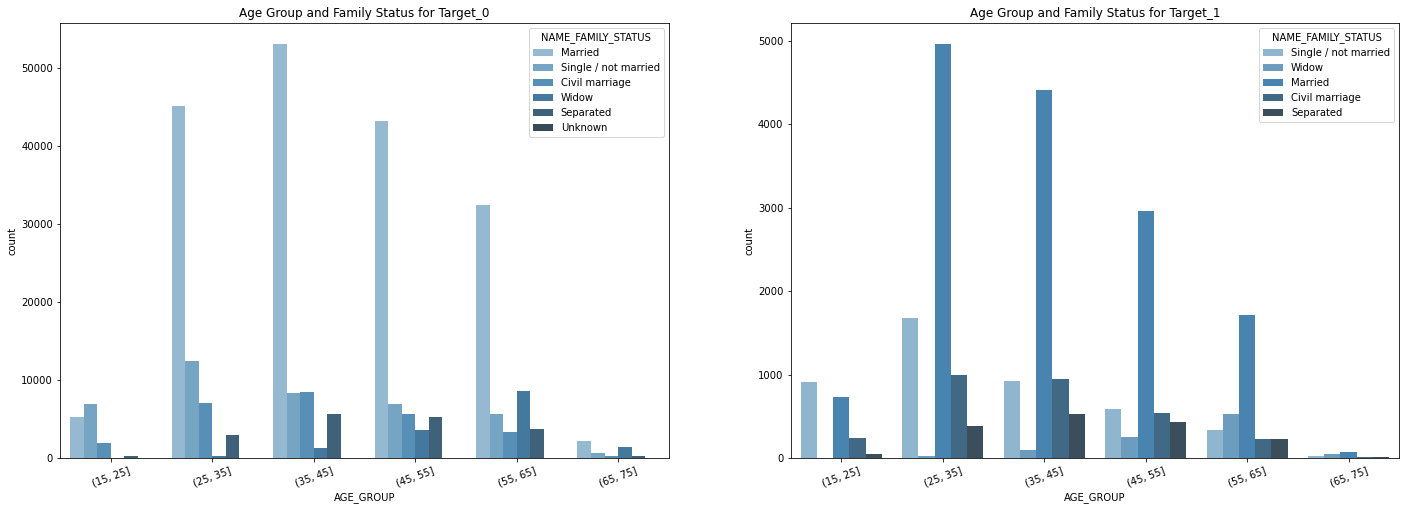

In [263]:
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
plt.title("Age Group and Family Status for Target_0")
sns.countplot('AGE_GROUP', hue ='NAME_FAMILY_STATUS' , data =Target_0, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Age Group and Family Status for Target_1")
sns.countplot('AGE_GROUP', hue ='NAME_FAMILY_STATUS' , data =Target_1, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)

plt.show()

In the age group 25-35 amd 35-45 of Married applicant have largest number of applicants with payment difficulties.


# CORRELATIONS:

In [ ]:
#Correlation between Target_0
Target_corr_0=Target_0.drop(cat_varList, axis=1)
correlation_Target_0=Target_corr_0.corr().abs()

In [ ]:
corr_df = correlation_Target_0.where(np.triu(np.ones(correlation_Target_0.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)

corr_df.head(10)


In [ ]:
#correlation for Target 1
Target_corr_1=Target_1.drop(cat_varList, axis=1)
correlation_Target_1=Target_corr_1.corr().abs()

corr_df1 = correlation_Target_1.where(np.triu(np.ones(correlation_Target_1.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df1.columns=['Column1','Column2','Correlation']
corr_df1.dropna(subset = ['Correlation'], inplace = True)
corr_df1 = corr_df.sort_values(by=['Correlation'], ascending=False)

corr_df1.head(10)

Top 10 columns for Target_0 and Target_1 from above are same.

# Continuous Variable Analysis:

In [ ]:
biVar1=corr_df.head(10)['Column1'].tolist()
biVar1

In [348]:
biVar2=corr_df.head(10)['Column2'].tolist()
biVar2

['OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_CREDIT',
 'CNT_CHILDREN',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AGE_IN_YEARS',
 'AMT_INCOME_TOTAL',
 'AMT_INCOME_TOTAL',
 'AMT_INCOME_TOTAL']

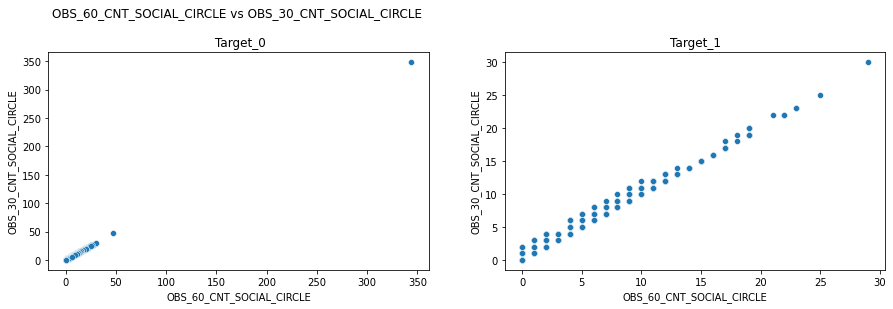

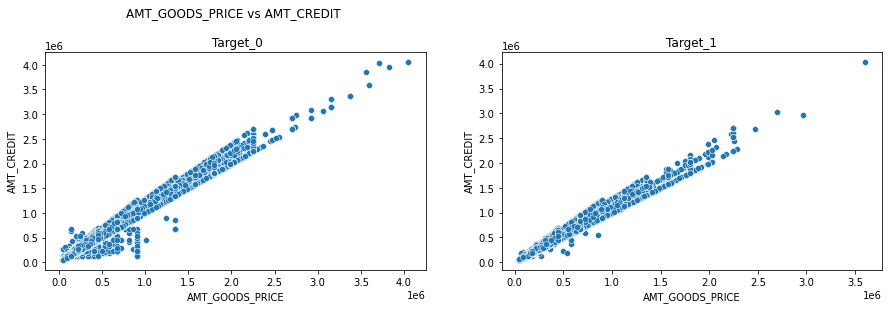

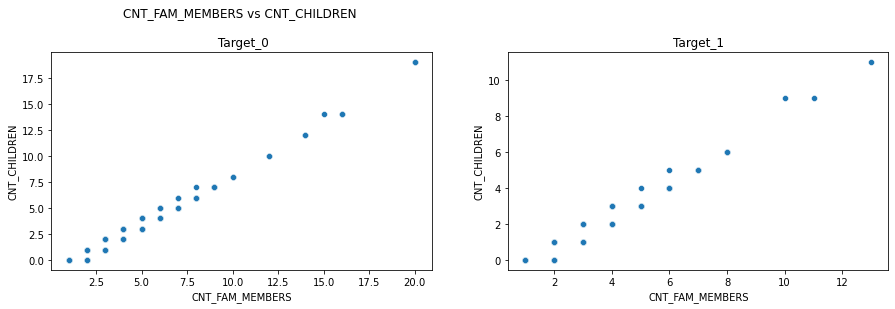

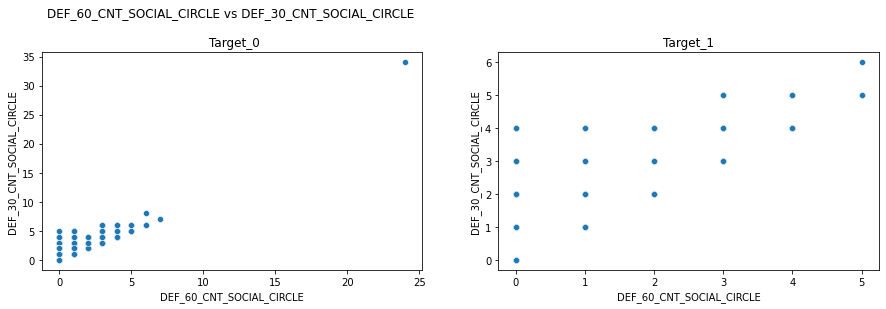

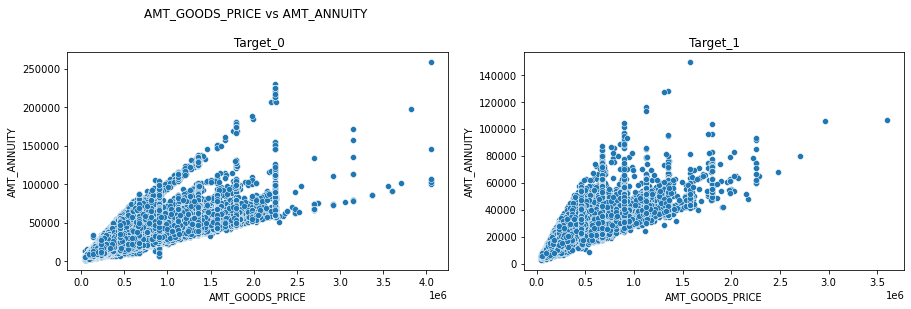

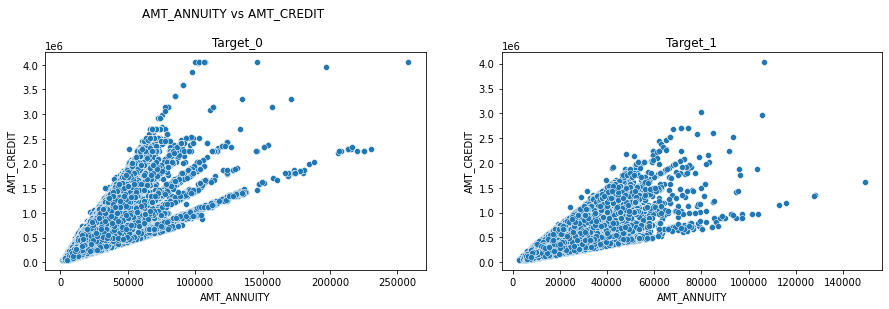

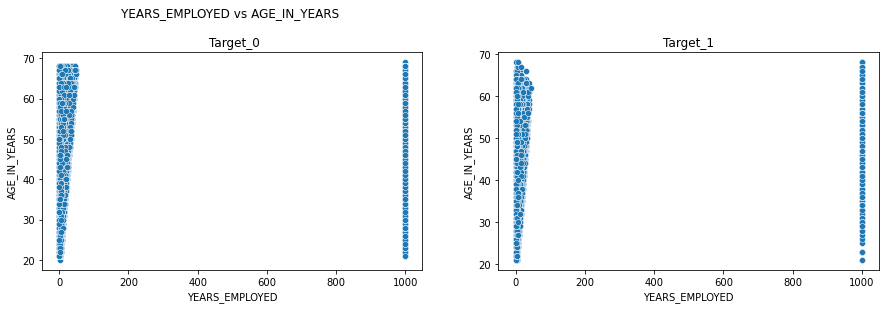

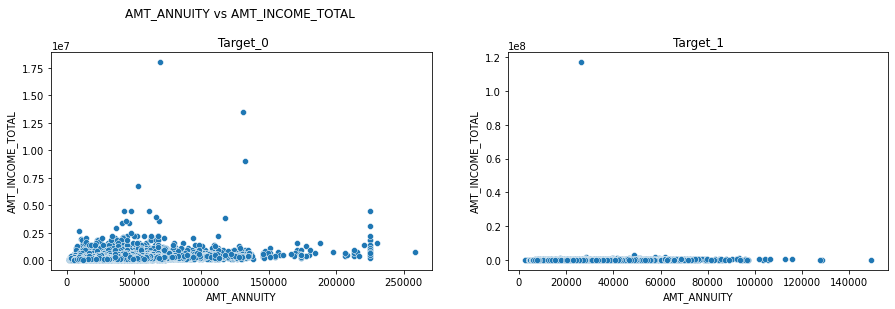

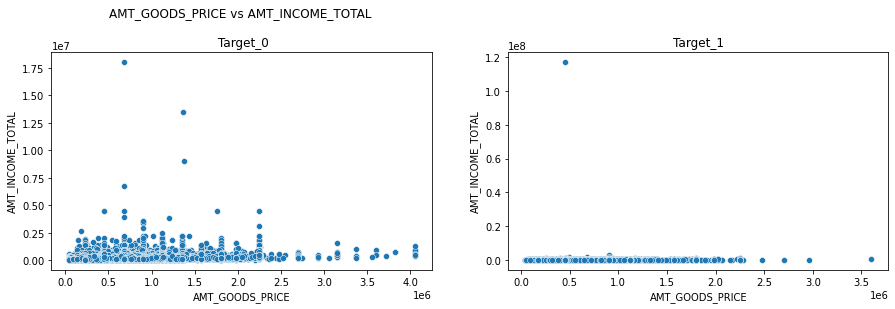

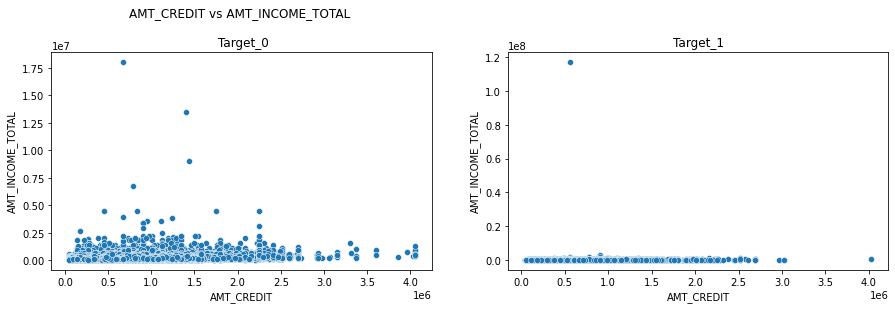

In [349]:
i=0
for i in range(10):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
    sns.scatterplot(x=biVar1[i], y=biVar2[i],data=Target_0,ax=ax1, ci=90)
    ax1.set_xlabel(biVar1[i])    
    ax1.set_ylabel(biVar2[i])
    ax1.set_title(f'{biVar1[i]} vs {biVar2[i]} \n\n Target_0',fontsize=12)
    
    sns.scatterplot(x=biVar1[i], y=biVar2[i],data=Target_1,ax=ax2)
    ax2.set_xlabel(biVar1[i])    
    ax2.set_ylabel(biVar2[i])
    ax2.set_title(f'Target_1',fontsize=12)
            
    plt.show()    
    i=i+1

1. OBS_30_CNT_SOCIAL_CIRCLE',OBS_60_CNT_SOCIAL_CIRCLE' - denote the client's social surroundings with observable 30/60    DPD.
These are definetly correlated. We can also see that its higher and steeper for Target_1, signyfying that in approval process this parameter must be strongly looked into.

2. DEF_30_CNT_SOCIAL_CIRCLE - Trend is going up. But Target_1 has lesser data and hence graph is not dense.

3. Years employed has an outlier value of 999 and this is skewing the graph

4. AMT_CREDIt and AMT_GOOD PRICE dont seem to be increasing proportionately with AMT_INCOME for TARGET_1, thus possibly      leading to default.

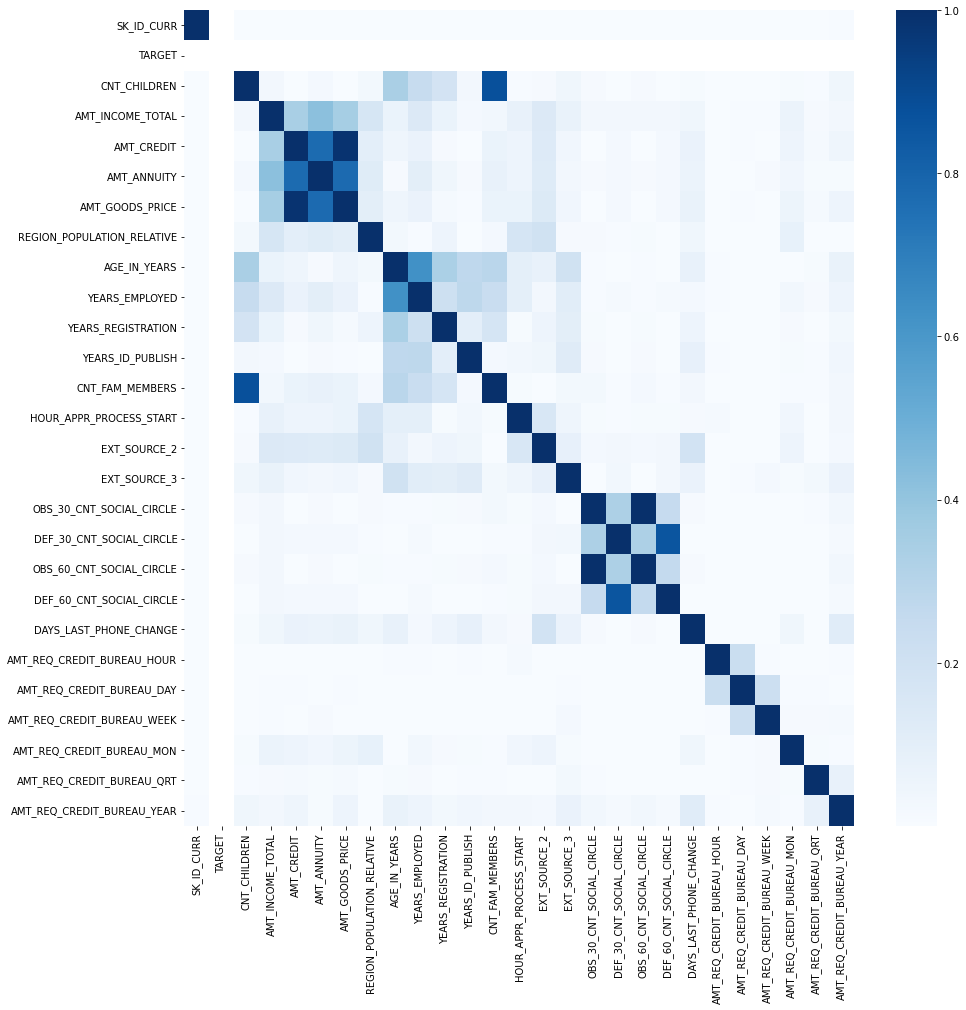

In [270]:
#Plotting Heatmap for Analysis

#df_num_0=Target_0[['TARGET']==0][num_varList]
plt.figure(figsize=(15,15))
sns.heatmap(correlation_Target_0, cmap='Blues')
plt.show()

<Figure size 864x720 with 0 Axes>

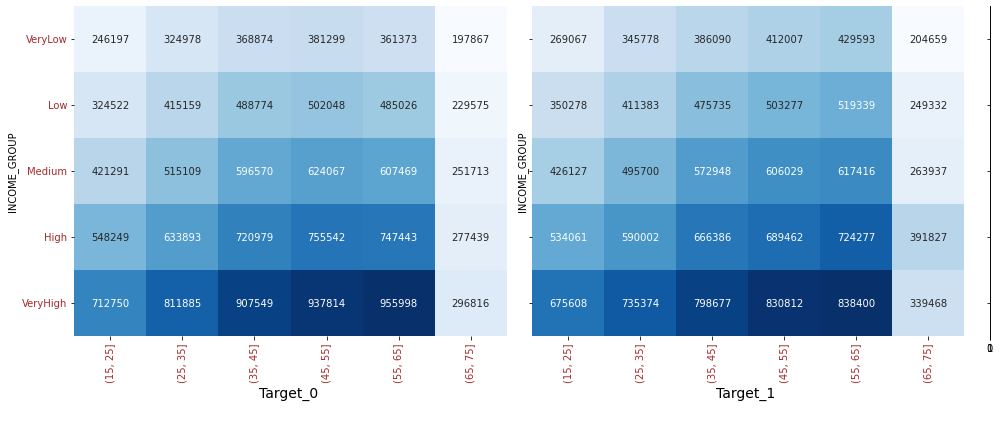

In [271]:
#AMT_CREDIT relationship analysis with AGE GROUP and income group
plt.figure(figsize=[12,10])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))

result=pd.pivot_table(data=Target_0, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")

c=sns.heatmap(result, annot=True,cmap='Blues', fmt="g", ax=ax1, cbar=False)
c.set_xlabel('Target_0 \n', fontsize=14,fontweight= 7)
c.set_xticklabels(c.get_xticklabels(), rotation = 90, fontsize = 10, color="Brown")

result1=pd.pivot_table(data=Target_1, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")

c1=sns.heatmap(result1, annot=True,cmap='Blues', fmt="g", ax=ax2, cbar=False)

c1.set_xlabel('Target_1 \n', fontsize=14,fontweight= 7,)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90, fontsize = 10, color="Brown")

c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 10, color="Brown")

plt.tight_layout()
plt.show()

55-65 Age Group in Very High income group has high amount credit. This could result as loss in loan book, as explained above.


# Previous Application Data:

Loading and Inspecting Data

In [350]:
# Reading the 'previous_application.csv' csv file 
prev_appl=pd.read_csv('previous_application.csv')

prev_appl.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [351]:
prev_appl.shape

(1670214, 37)

In [352]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [278]:
prev_appl.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

# Data Cleaning:

Missing values Treatment

In [353]:
prev_appl.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [284]:
prev_appl.isnull().sum().mean()

300252.3243243243

In [286]:
#Calculating percentage of missing values

prev_appl.isnull().sum()/len(prev_appl)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

# Handling Missing Values:

In [354]:
prev_appl = prev_appl.dropna(axis=0, subset=['AMT_ANNUITY'])
prev_appl = prev_appl.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
prev_appl.isnull().sum()/len(prev_appl)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               40.546489
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              40.546489
RATE_INTEREST_PRIMARY          99.522595
RATE_INTEREST_PRIVILEGED       99.522595
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                32.647474
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [355]:
#Deleting rows with Null values for AMT_ANNUITY, AMT_GOODS_PRICE. 

prev_appl = prev_appl.dropna(axis=0, subset=['AMT_ANNUITY'])
prev_appl = prev_appl.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
prev_appl.isnull().sum()/len(prev_appl)*100


SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               40.546489
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              40.546489
RATE_INTEREST_PRIMARY          99.522595
RATE_INTEREST_PRIVILEGED       99.522595
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                32.647474
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [289]:
#Columns with >20% NULL values 

print(prev_appl.columns[(prev_appl.isnull().sum() * 100 / prev_appl.shape[0]) > 20])

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [290]:
prev_appl[(prev_appl['NAME_CONTRACT_STATUS']!="Approved")]['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=True)


Series([], Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64)

In [291]:
prev_appl[(prev_appl['NAME_CONTRACT_STATUS']=="Approved")]['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=True)


0.0    624021
1.0    331064
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [292]:
prev_appl[(prev_appl['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_FIRST_DRAWING'].value_counts(dropna=True)


Series([], Name: DAYS_FIRST_DRAWING, dtype: int64)

In [295]:
prev_appl[(prev_appl['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_FIRST_DUE'].value_counts(dropna=True)


Series([], Name: DAYS_FIRST_DUE, dtype: int64)

In [296]:
prev_appl[(prev_appl['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_LAST_DUE_1ST_VERSION'].value_counts(dropna=True)


Series([], Name: DAYS_LAST_DUE_1ST_VERSION, dtype: int64)

In [297]:
prev_appl[(prev_appl['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_LAST_DUE'].value_counts(dropna=True)


Series([], Name: DAYS_LAST_DUE, dtype: int64)

In [298]:
prev_appl[(prev_appl['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_TERMINATION'].value_counts(dropna=True)


Series([], Name: DAYS_TERMINATION, dtype: int64)

In [299]:
prev_appl[prev_appl['NAME_CONTRACT_STATUS']!="Approved"].shape


(252382, 37)

In [300]:
prev_appl[prev_appl['DAYS_LAST_DUE'].isna()].shape


(291235, 37)

We will drop all these rows as we will not do any analysis as all columns mentioned above are NAN for Non approved case which is correct representation. Without a loan, applicant cant draw
and applicant will not have Insurance too.  

In [301]:
#Dropping all columns with >20 null values
drop_col=prev_appl.columns[(prev_appl.isnull().sum() * 100 / prev_appl.shape[0]) > 20]
prev_appl.drop(axis=1, columns=drop_col, inplace=True)
prev_appl.shape

(1246320, 26)

In [303]:
#Checking columns with NULL values

prev_appl.columns[(prev_appl.isnull().sum()>0)]

Index([], dtype='object')

In [356]:
prev_appl.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.246320e+06      7.409810e+05     1.246320e+06   
mean   2.492727e+05      6.999174e+03     2.326240e+05   
std    3.465843e+05      2.133823e+04     3.186729e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    5.157450e+04      0.000000e+00     5.220000e+04   
50%    1.161675e+05      2.245500e+03     1.125000e+05   
75%    2.700000e+05      8.298000e+03     2.475000e+05   
max    4.509688e+06      3.060045e+06     5.850000e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.246320e+06            1.246320e+06      740981.000000   
mean              1.258250e+01            9.978914e-01           0.083225   
std               3.326113e+00            4.587116e-02           0.108863   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.089711   
75%               1.500000e+01            1.000000e+00           0.108919   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5950.000000               5950.000000   1.246320e+06   
mean                0.188365                  0.773525  -1.021855e+03   
std                 0.087676                  0.100872   7.864511e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.534000e+03   
50%                 0.189122                  0.835095  -7.660000e+02   
75%                 0.193330                  0.852537  -3.850000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.246320e+06  1.246320e+06       955085.000000   955085.000000   
mean       4.056201e+02  1.671954e+01       353613.993085    10643.120380   
std        8.246103e+03  1.448712e+01        64161.263536    64504.865711   
min       -1.000000e+00  0.000000e+00        -2854.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1605.000000   
50%        2.700000e+01  1.200000e+01       365243.000000     -826.000000   
75%        1.460000e+02  2.400000e+01       365243.000000     -414.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              955085.000000  955085.000000     955085.000000   
mean                19170.421695   71007.408200      72338.349830   
std                 82882.554798  145553.783644     146551.201245   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1294.000000   -1333.000000      -1318.000000   
50%                  -411.000000    -554.000000       -543.000000   
75%                    64.000000    -100.000000        -92.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              955085.000000  
mean                    0.346633  
std                     0.475898  
min                     0.000000  
25%                     0.0000

In [306]:
#Dropping some additional numerical variable columns as we dont use them for analysis also they are irrelevant.

drop_col=['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
prev_appl.drop(axis=1, columns=drop_col, inplace=True)
prev_appl.shape

(1246320, 22)

In [307]:
# Analysis of object variable value
for i in prev_appl.columns:
    if prev_appl[i].dtypes=="object":
        print(prev_appl[i].value_counts(normalize=True, dropna= False))
        print('\n\n')

Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: NAME_CONTRACT_TYPE, dtype: float64



SATURDAY     0.152194
FRIDAY       0.149213
WEDNESDAY    0.148734
TUESDAY      0.148228
MONDAY       0.146892
THURSDAY     0.146119
SUNDAY       0.108620
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64



Y    0.997222
N    0.002778
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64



XAP                                 0.629659
XNA                                 0.314679
Repairs                             0.019014
Other                               0.012436
Urgent needs                        0.006744
Buying a used car                   0.002304
Building a house or an annex        0.002161
Everyday expenses                   0.001921
Medicine                            0.001739
Payments on other loans             0.001545
Education                           0.001257
Journey                             0.000991
Purchase of electronic equipment    0.000846


# Dropping columns :


WEEKDAY_APPR_PROCESS_START - Not relevant

NAME_PRODUCT_TYPE - 55% XNA values

NAME_CASH_LOAN_PURPOSE - 90% NNA / XAP values, 

NAME_GOODS_CATEGORY - hIGH XNA values

NAME_PAYMENT_TYPE - 19% XAP values

CODE_REJECT_REASON - 80% XAP values

In [308]:
drop_col=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON']
prev_appl.drop(axis=1, columns=drop_col, inplace=True)
prev_appl.shape

(1246320, 16)

# Univariate Analysis:

Categorical Nominal

Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: NAME_CONTRACT_TYPE, dtype: float64


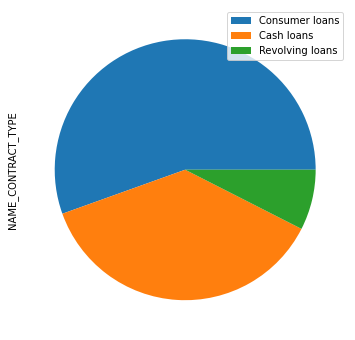



SATURDAY     0.152194
FRIDAY       0.149213
WEDNESDAY    0.148734
TUESDAY      0.148228
MONDAY       0.146892
THURSDAY     0.146119
SUNDAY       0.108620
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


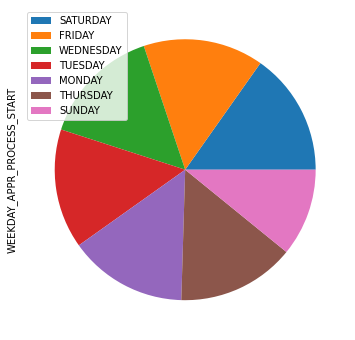



Y    0.997222
N    0.002778
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64


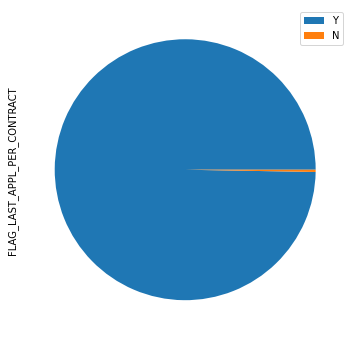



XAP                                 0.629659
XNA                                 0.314679
Repairs                             0.019014
Other                               0.012436
Urgent needs                        0.006744
Buying a used car                   0.002304
Building a house or an annex        0.002161
Everyday expenses                   0.001921
Medicine                            0.001739
Payments on other loans             0.001545
Education                           0.001257
Journey                             0.000991
Purchase of electronic equipment    0.000846
Buying a new car                    0.000807
Wedding / gift / holiday            0.000768
Buying a home                       0.000694
Car repairs                         0.000639
Furniture                           0.000600
Buying a holiday home / land        0.000428
Business development                0.000341
Gasification / water supply         0.000240
Buying a garage                     0.000109
Hobby   

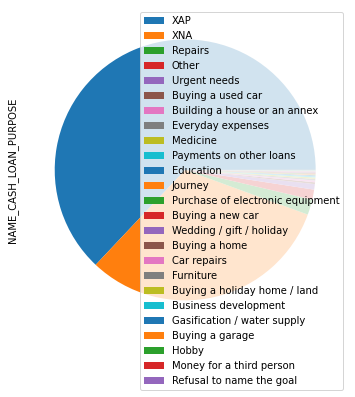



Approved        0.797498
Refused         0.193344
Canceled        0.008427
Unused offer    0.000730
Name: NAME_CONTRACT_STATUS, dtype: float64


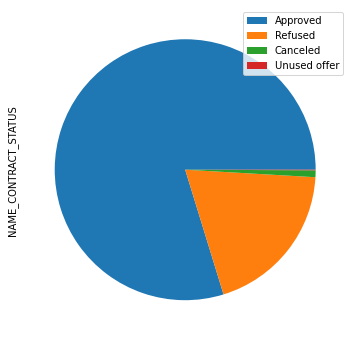



Cash through the bank                        0.799903
XNA                                          0.192719
Non-cash from your account                   0.006519
Cashless from the account of the employer    0.000859
Name: NAME_PAYMENT_TYPE, dtype: float64


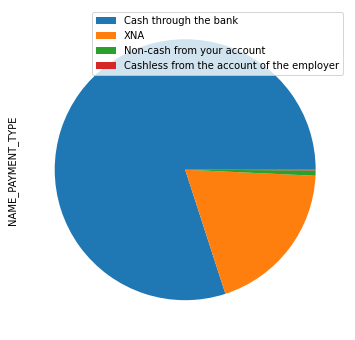



XAP       0.805919
HC        0.114008
LIMIT     0.040173
SCO       0.028079
SCOFR     0.006559
VERIF     0.002686
XNA       0.001826
CLIENT    0.000730
SYSTEM    0.000018
Name: CODE_REJECT_REASON, dtype: float64


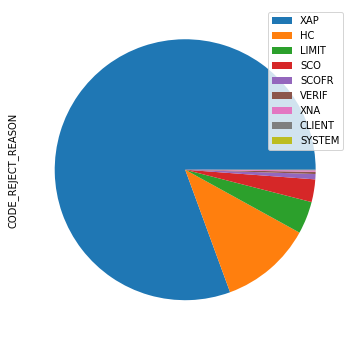



Unaccompanied      0.404399
NaN                0.326475
Family             0.168696
Spouse, partner    0.052993
Children           0.024769
Other_B            0.013801
Other_A            0.007118
Group of people    0.001749
Name: NAME_TYPE_SUITE, dtype: float64


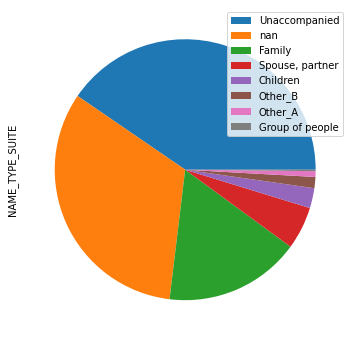



Repeater     0.677066
New          0.236334
Refreshed    0.085877
XNA          0.000723
Name: NAME_CLIENT_TYPE, dtype: float64


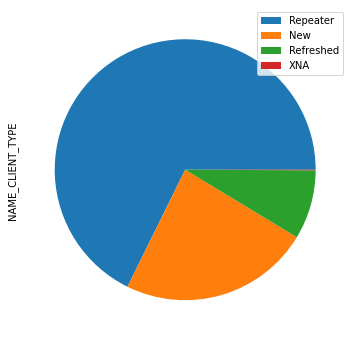



XNA                         4.519385e-01
Mobile                      1.607404e-01
Consumer Electronics        9.626821e-02
Computers                   8.022659e-02
Audio/Video                 7.845096e-02
Furniture                   4.275547e-02
Construction Materials      1.995154e-02
Clothing and Accessories    1.878169e-02
Photo / Cinema Equipment    1.857709e-02
Auto Accessories            5.739296e-03
Jewelry                     5.022787e-03
Homewares                   4.010206e-03
Medical Supplies            3.081873e-03
Vehicles                    2.675878e-03
Sport and Leisure           2.366166e-03
Gardening                   2.128667e-03
Other                       2.049233e-03
Office Appliances           1.841421e-03
Tourism                     1.324700e-03
Medicine                    1.243661e-03
Direct Sales                3.570512e-04
Fitness                     1.676937e-04
Additional Service          1.027024e-04
Education                   8.585275e-05
Weapon        

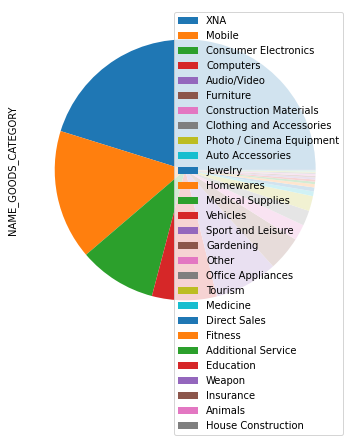



POS      0.554438
Cash     0.370341
Cards    0.074880
Cars     0.000341
Name: NAME_PORTFOLIO, dtype: float64


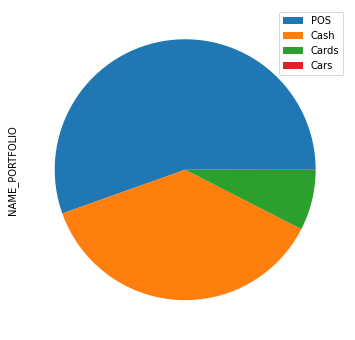



XNA        0.554779
x-sell     0.324658
walk-in    0.120563
Name: NAME_PRODUCT_TYPE, dtype: float64


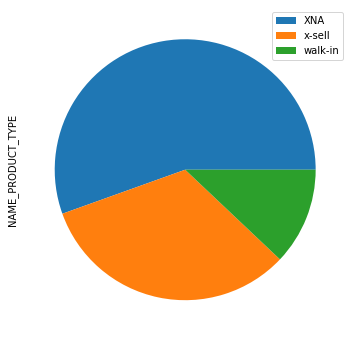



Country-wide                  0.359302
Credit and cash offices       0.317926
Stone                         0.166645
Regional / Local              0.085031
AP+ (Cash loan)               0.038082
Contact center                0.027836
Channel of corporate sales    0.004817
Car dealer                    0.000363
Name: CHANNEL_TYPE, dtype: float64


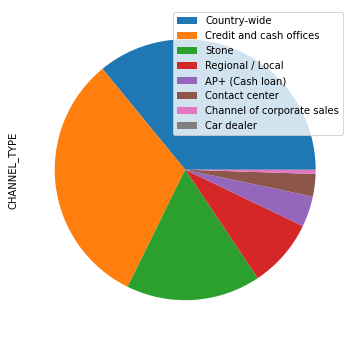



XNA                     0.389958
Consumer electronics    0.308245
Connectivity            0.190554
Furniture               0.045780
Construction            0.023736
Clothing                0.019091
Industry                0.015262
Auto technology         0.003989
Jewelry                 0.002173
MLM partners            0.000800
Tourism                 0.000412
Name: NAME_SELLER_INDUSTRY, dtype: float64


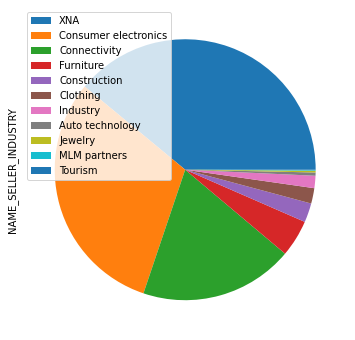



middle        0.309335
high          0.283497
low_normal    0.258437
XNA           0.074880
low_action    0.073850
Name: NAME_YIELD_GROUP, dtype: float64


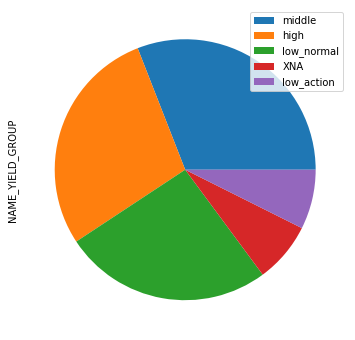



POS household with interest       0.206895
POS mobile with interest          0.152865
Cash X-Sell: middle               0.115446
Cash X-Sell: low                  0.104506
POS industry with interest        0.078757
POS household without interest    0.066522
Cash Street: high                 0.047852
Cash X-Sell: high                 0.047581
Card Street                       0.041335
Card X-Sell                       0.033545
Cash Street: middle               0.027808
Cash Street: low                  0.027147
POS mobile without interest       0.019322
POS other with interest           0.018255
POS industry without interest     0.010111
POS others without interest       0.002050
Name: PRODUCT_COMBINATION, dtype: float64


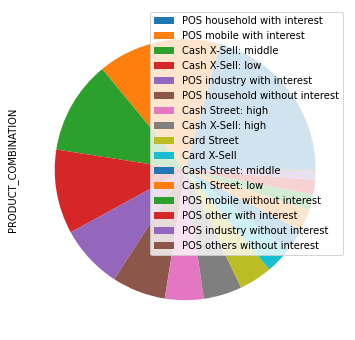

In [357]:
#Checking all Object types Variables and their values
for i in prev_appl.columns:
    if prev_appl[i].dtypes=="object":
        print(prev_appl[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        prev_appl[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()
        print("\n")
        

1. This dataframe has a differnt type of loan called Consumer Loan, which was not there in Application data frame. 55% of loans are consumer loans. 37% cash loans and rest revolving.
2. Approved loans are 79% and refused, cancelled, unused - rest *IMBALANCE IN DATA*.
3. 67% are repeaters. NAME_CLIENT_TYPE also has some null values showing as XNA.
4. 55% of the applicants have taken loan for POS purchase.
5. Name seller industry has 37% XNA values, Consumer electronics is next highest category at 30%.

# Numerical Variable:

In [358]:
prev_appl.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.246320e+06      7.409810e+05     1.246320e+06   
mean   2.492727e+05      6.999174e+03     2.326240e+05   
std    3.465843e+05      2.133823e+04     3.186729e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    5.157450e+04      0.000000e+00     5.220000e+04   
50%    1.161675e+05      2.245500e+03     1.125000e+05   
75%    2.700000e+05      8.298000e+03     2.475000e+05   
max    4.509688e+06      3.060045e+06     5.850000e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.246320e+06            1.246320e+06      740981.000000   
mean              1.258250e+01            9.978914e-01           0.083225   
std               3.326113e+00            4.587116e-02           0.108863   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.089711   
75%               1.500000e+01            1.000000e+00           0.108919   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5950.000000               5950.000000   1.246320e+06   
mean                0.188365                  0.773525  -1.021855e+03   
std                 0.087676                  0.100872   7.864511e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.534000e+03   
50%                 0.189122                  0.835095  -7.660000e+02   
75%                 0.193330                  0.852537  -3.850000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.246320e+06  1.246320e+06       955085.000000   955085.000000   
mean       4.056201e+02  1.671954e+01       353613.993085    10643.120380   
std        8.246103e+03  1.448712e+01        64161.263536    64504.865711   
min       -1.000000e+00  0.000000e+00        -2854.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1605.000000   
50%        2.700000e+01  1.200000e+01       365243.000000     -826.000000   
75%        1.460000e+02  2.400000e+01       365243.000000     -414.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              955085.000000  955085.000000     955085.000000   
mean                19170.421695   71007.408200      72338.349830   
std                 82882.554798  145553.783644     146551.201245   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1294.000000   -1333.000000      -1318.000000   
50%                  -411.000000    -554.000000       -543.000000   
75%                    64.000000    -100.000000        -92.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              955085.000000  
mean                    0.346633  
std                     0.475898  
min                     0.000000  
25%                     0.0000

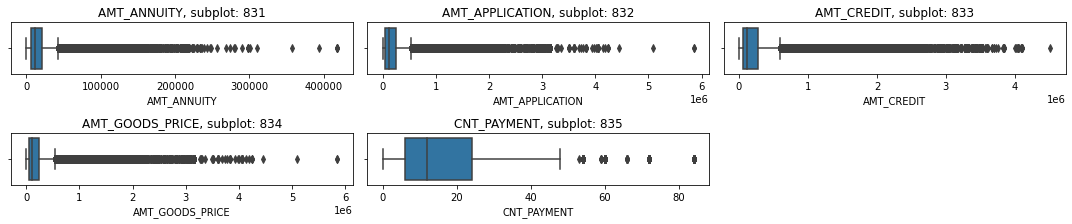

In [326]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in prev_appl.columns:
    if prev_appl[i].dtypes=="float64" or prev_appl[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(prev_appl[i])
        c = c + 1

fig.tight_layout()
plt.show()

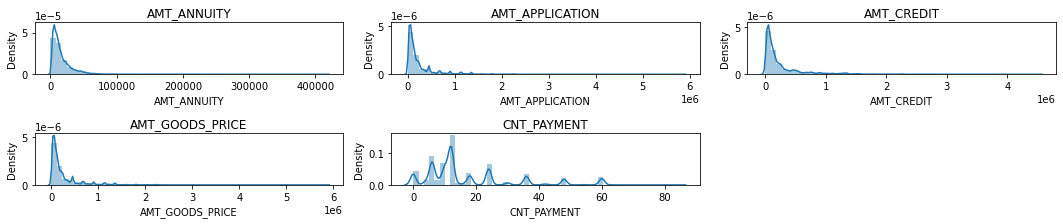

In [327]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in prev_appl.columns:
    if prev_appl[i].dtypes=="float64" or prev_appl[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title(i)
        plt.xlabel(i)
        sns.distplot(a=prev_appl[i])
        c = c + 1

fig.tight_layout()
plt.show()

Box plot and distribution both signify that Continuous Variable have high percentage of outlier.


# Outlier Treatment:

In [359]:
#finding Outliers (>97%)

for i in prev_appl.columns:
    if prev_appl[i].dtypes=="float64" or prev_appl[i].dtypes=="float32":
        print( i, ":", end= " ")
        print(prev_appl.iloc[np.where(np.abs(ss.zscore(prev_appl[i])>2))].shape, end=" ")
        print("Percentage of Outlier rows: ", round((prev_appl.iloc[np.where(np.abs(ss.zscore(prev_appl[i])>2))].shape[0]/prev_appl.shape[0]*100), 2))

AMT_ANNUITY : (61959, 37) Percentage of Outlier rows:  4.97
AMT_APPLICATION : (75698, 37) Percentage of Outlier rows:  6.07
AMT_CREDIT : (69957, 37) Percentage of Outlier rows:  5.61
AMT_DOWN_PAYMENT : (0, 37) Percentage of Outlier rows:  0.0
AMT_GOODS_PRICE : (75714, 37) Percentage of Outlier rows:  6.08
RATE_DOWN_PAYMENT : (0, 37) Percentage of Outlier rows:  0.0
RATE_INTEREST_PRIMARY : (0, 37) Percentage of Outlier rows:  0.0
RATE_INTEREST_PRIVILEGED : (0, 37) Percentage of Outlier rows:  0.0
CNT_PAYMENT : (103224, 37) Percentage of Outlier rows:  8.28
DAYS_FIRST_DRAWING : (0, 37) Percentage of Outlier rows:  0.0
DAYS_FIRST_DUE : (0, 37) Percentage of Outlier rows:  0.0
DAYS_LAST_DUE_1ST_VERSION : (0, 37) Percentage of Outlier rows:  0.0
DAYS_LAST_DUE : (0, 37) Percentage of Outlier rows:  0.0
DAYS_TERMINATION : (0, 37) Percentage of Outlier rows:  0.0
NFLAG_INSURED_ON_APPROVAL : (0, 37) Percentage of Outlier rows:  0.0


Above rows can be deleted as dataframe is of huge size but will not.

# Bivariate Analysis:

Categorical Variable

In [396]:
prev_appl_corr=prev_appl.drop(axis=1,columns=['SK_ID_CURR','SK_ID_PREV'] )

correlation=prev_appl_corr.corr().abs()

In [397]:
corr_prev = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_prev.columns=['Column1','Column2','Correlation']
corr_prev.dropna(subset=['Correlation'],inplace=True)
corr_prev = corr_prev.sort_values(by=['Correlation'], ascending=False)

corr_prev

Column1                  Column2  Correlation
77             AMT_GOODS_PRICE          AMT_APPLICATION     0.999883
78             AMT_GOODS_PRICE               AMT_CREDIT     0.993028
39                  AMT_CREDIT          AMT_APPLICATION     0.992965
339           DAYS_TERMINATION            DAYS_LAST_DUE     0.967996
76             AMT_GOODS_PRICE              AMT_ANNUITY     0.820895
..                         ...                      ...          ...
288  DAYS_LAST_DUE_1ST_VERSION         AMT_DOWN_PAYMENT     0.000869
310              DAYS_LAST_DUE   NFLAG_LAST_APPL_IN_DAY     0.000827
329           DAYS_TERMINATION   NFLAG_LAST_APPL_IN_DAY     0.000753
271             DAYS_FIRST_DUE  HOUR_APPR_PROCESS_START     0.000548
277             DAYS_FIRST_DUE         SELLERPLACE_AREA     0.000466

[169 rows x 3 columns]

<Figure size 1440x576 with 0 Axes>

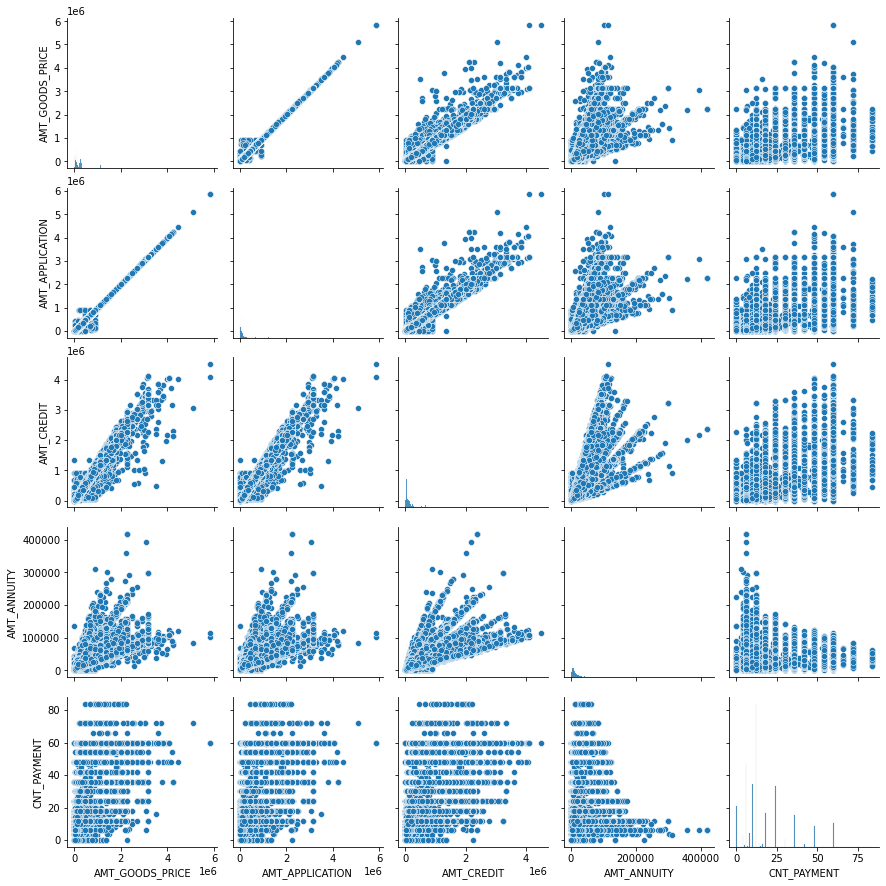

In [398]:
plt.figure(figsize=[20,8])
sns.pairplot(prev_appl[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])
plt.show()

1. AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION - as expected have high correlation. Higher the value of good purchased more there will be need of loan and surely all these will correlate

2. Similary, AMT_Credit to AMT_GOOD_PRICE also the correlation is high

3. Column CNT_Payment ideally should have had a high correlation with AMT_credit, ie higher credit, more the term of 
loan. But no such correaltion can be seen.

# Multivariate Analysis:

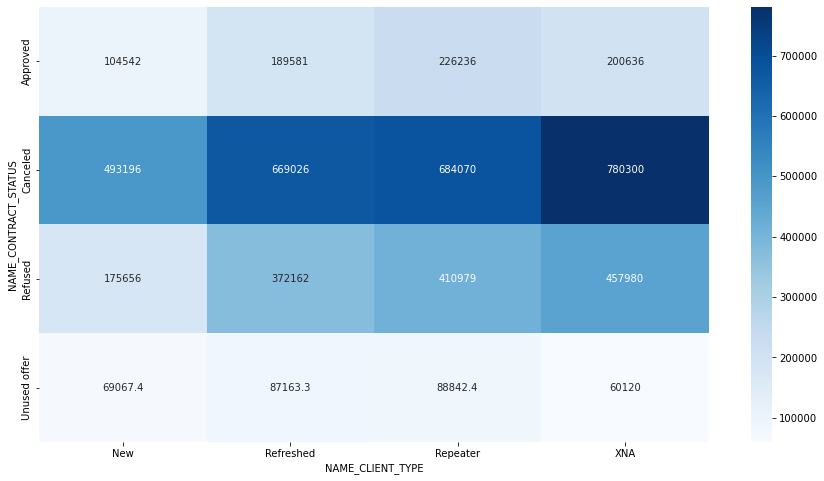

In [402]:
#Contract status vs name client type aggregating over application amount

result=pd.pivot_table(data=prev_appl, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(result, annot=True,cmap='Blues', fmt="g")
plt.show()

1. Unused offer application amount is low.

2. Cancelled application amount is high. The bank may be refusing these possibly as the Debt liabiltiy ratio of consumer must be going high due to the high amount and thus credit defualt risk.

3. Repreater's application amount is higher than the New customers. This may indicate that the bank has more conducive policies/rate of interest etc for repeat applicants.

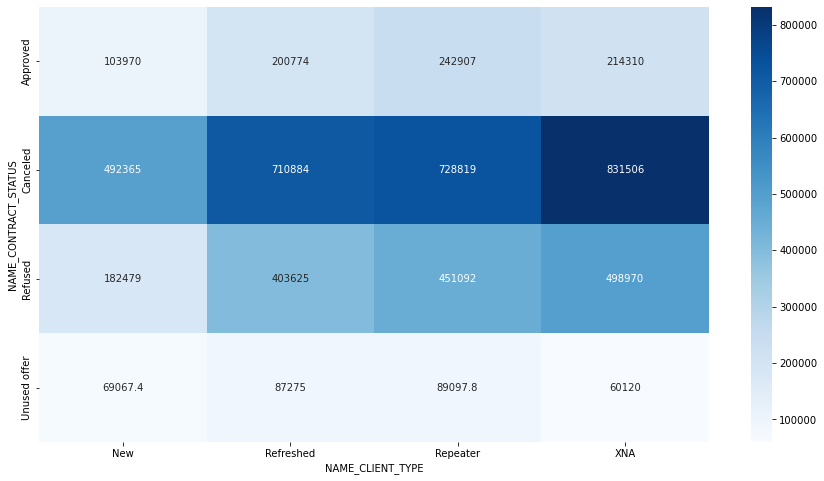

In [401]:
# Contract status vs name client type aggregating over AMT CREDIT

result=pd.pivot_table(data=prev_appl, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_CREDIT')
plt.figure(figsize=(15,8))
sns.heatmap(result, annot=True,cmap='Blues', fmt="g")
plt.show()

1. Unused offer CREDIT AMOUNT is low. This may be the reason for customer not using it.
2. Unable to understand why for cancelled and refused there should be any credit amount?

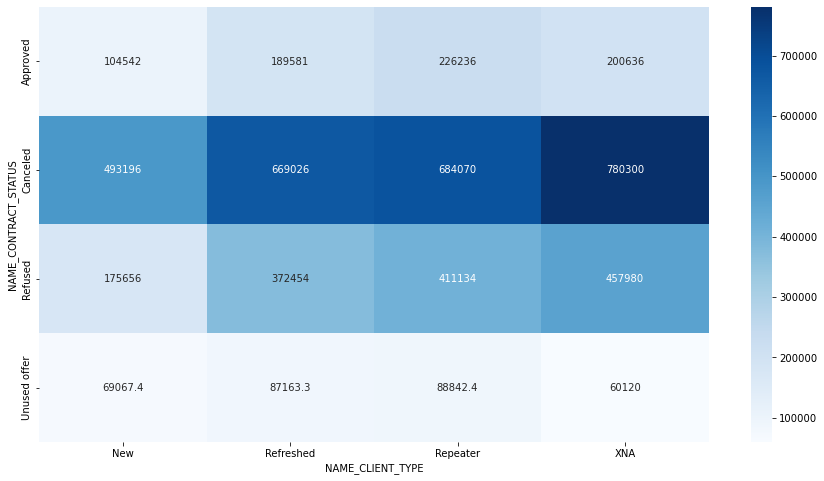

In [405]:
#Contract status vs name client type aggregating over AMOUNT GOOD PRICE

result=pd.pivot_table(data=prev_appl, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(result, annot=True,cmap='Blues', fmt="g")
plt.show()

All cancelled and refused cases are having higher value of goods than other categories.

# Merging  Two Data Frames Application Data and Previous Application:

In [406]:
#checking any duplicate values in SK_ID_PREV
dup_value= prev_appl[prev_appl.duplicated(subset='SK_ID_CURR')]
dup_value.shape

(908809, 37)

SK_ID_CURR has duplicates in prev_df, which indicates that app_df and prev_df will have a one to many relationship


# Merging, Loading and Inspecting Data:

In [408]:
Merged_df=pd.merge( appl_data,prev_appl, how='left', on="SK_ID_CURR")
Merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100003       0           Cash loans           F             0   
3      100003       0           Cash loans           F             0   
4      100004       0      Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0          202500.0      406597.5        24700.5           351000.0   
1          270000.0     1293502.5        35698.5          1129500.0   
2          270000.0     1293502.5        35698.5          1129500.0   
3          270000.0     1293502.5        35698.5          1129500.0   
4           67500.0      135000.0         6750.0           135000.0   

  NAME_TYPE_SUITE_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0     Unaccompanied          Working  Secondary / secondary special   
1            Family    State servant               Higher education   
2            Family    State servant               Higher education   
3            Family    State servant               Higher education   
4     Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   AGE_IN_YEARS  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0          25.0             1.0                 9.0               5.0   
1          45.0             3.0                 3.0               0.0   
2          45.0             3.0                 3.0               0.0   
3          45.0             3.0                 3.0               0.0   
4          52.0             0.0                11.0               6.0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2      Core staff              2.0                     1   
3      Core staff              2.0                     1   
4        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  \
0                            2                    WEDNESDAY   
1                            1                       MONDAY   
2                            1                       MONDAY   
3                            1                       MONDAY   
4                            2                       MONDAY   

   HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
0                         10                           0   
1                         11                           0   
2                         11                           0   
3                         11                           0   
4                          9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                     

In [409]:
Merged_df.shape

(1078854, 87)

# Data Analysis:

In [411]:
# Plotting Name contract status to check % of defaulters, ie Target_0 and Target_1

contract_st=Merged_df['NAME_CONTRACT_STATUS'].unique()
contract_st

array(['Approved', 'Refused', nan, 'Canceled', 'Unused offer'],
      dtype=object)

Target_0 and Target_1 for :  Approved
0    0.924108
1    0.075892
Name: TARGET, dtype: float64


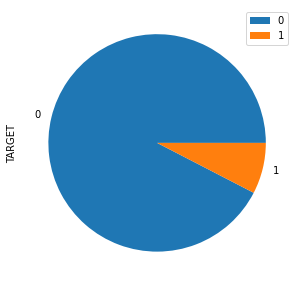

Target_0 and Target_1 for :  Refused
0    0.884182
1    0.115818
Name: TARGET, dtype: float64


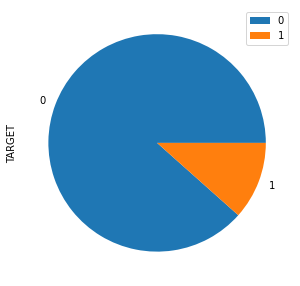

Target_0 and Target_1 for :  nan
Series([], Name: TARGET, dtype: float64)


No handles with labels found to put in legend.


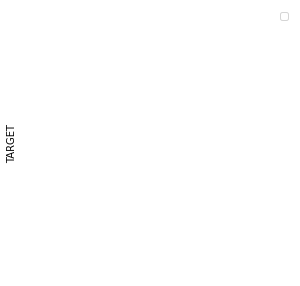

Target_0 and Target_1 for :  Canceled
0    0.917609
1    0.082391
Name: TARGET, dtype: float64


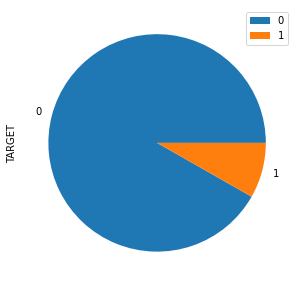

Target_0 and Target_1 for :  Unused offer
0    0.895141
1    0.104859
Name: TARGET, dtype: float64


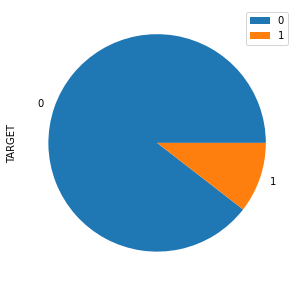

In [412]:
for i in contract_st:
    print("Target_0 and Target_1 for : ",i)
    plt.figure(figsize=[8,5])
    print(Merged_df[(Merged_df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts(normalize=True))
    Merged_df[(Merged_df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts().plot.pie(normalize=True)
    plt.legend()
    plt.show()

1. 7.5% of Approved loans have defaulters.

2. Previous applications with Refused, Cancelled, Unused loans also have defaulters which is a matter of concern. This indicates that the financial company had Refused/cancelled previous application, but has approved the current and is facing default on these loans.

In [413]:
# Calculating number of Defaulters in approved cases
approved_default=Merged_df[(Merged_df['NAME_CONTRACT_STATUS']=="Approved") & (Merged_df['TARGET']==1)]
approved_default.shape

(64400, 87)

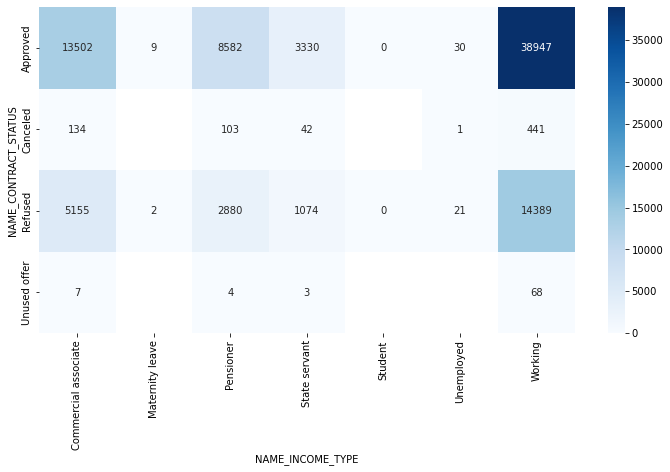

In [414]:
#"NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target

result=pd.pivot_table(data=Merged_df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(result, annot=True,cmap='Blues', fmt="g")
plt.show()

1. High on above matrix shows correlation to defaulters, Target_1 are defaulters.

2. Working applicant with Approved status have defaulted in highest numbers.

3. Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern. This indicates that the financial company had Refused/cancelled previous application, but has approved the current and is facing default on these loans.

4. 14,389 applicanst of working class were REFUSED earlier and now have defaulted.

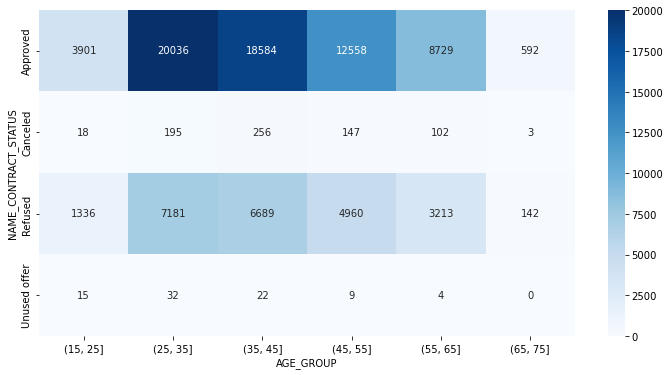

In [415]:
#"NAME_CONTRACT_STATUS", "AGE_GROUP",aggregating on Target

result=pd.pivot_table(data=Merged_df,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(result, annot=True,cmap='Blues', fmt="g")
plt.show()

1. Target_1 are defaulters, higher on the above matrix shows correlation to default.
2. Approved loans of age group 25-35 and 35-45 have higher defaults
3. Refused, cancelled, loans in previous application have defaulted in current.

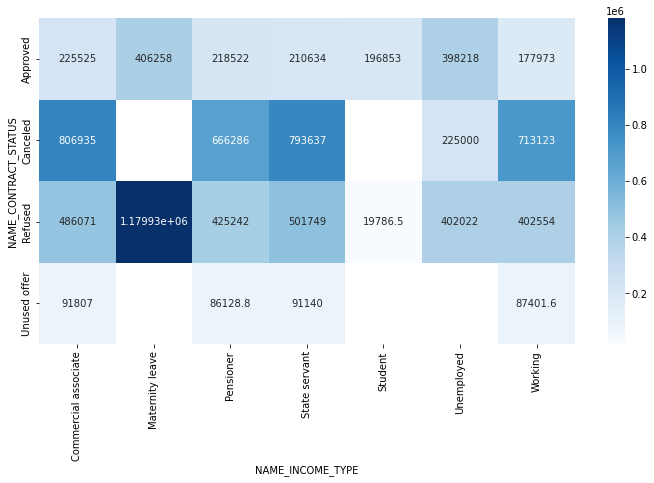

In [416]:
#"NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on AMT_CREDIT

result=pd.pivot_table(data=Merged_df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(12,6))
sns.heatmap(result, annot=True,cmap='Blues', fmt="g")
plt.show()

1. Higher credits been offered to unemployed, maternity leave is a notable factor.

2. Unused offers have smaller credit values and possibly the reason why applicant is not usign them.


In [417]:
columns=['INCOME_GROUP','AGE_GROUP','CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE',"ORGANIZATION_TYPE",'OWN_CAR_flag','OWN_REALTY_flag' ]

for i in columns:
    print(approved_default[i].value_counts(normalize=True))
    print('\n')

Medium      0.291770
High        0.261304
Low         0.214581
VeryHigh    0.137997
VeryLow     0.094348
Name: INCOME_GROUP, dtype: float64


(25, 35]    0.311118
(35, 45]    0.288571
(45, 55]    0.195000
(55, 65]    0.135543
(15, 25]    0.060575
(65, 75]    0.009193
Name: AGE_GROUP, dtype: float64


F    0.59222
M    0.40778
Name: CODE_GENDER, dtype: float64


Working                 0.604767
Commercial associate    0.209658
Pensioner               0.133261
State servant           0.051708
Unemployed              0.000466
Maternity leave         0.000140
Name: NAME_INCOME_TYPE, dtype: float64


Laborers                 0.314332
Sales staff              0.168312
Drivers                  0.111941
Core staff               0.090577
Managers                 0.070796
Security staff           0.038783
High skill tech staff    0.038361
Cooking staff            0.034270
Medicine staff           0.032667
Accountants              0.026530
Cleaning staff           0.024442
Low-skill Laborers     

# Defaulters in Approved Applications:

'INCOME_GROUP' - Medium income

'AGE_GROUP - 25-35, followed by 35-45

'NAME_INCOME_TYPE' - Working

'OCCUPATION_TYPE' - Labourers 31%

'ORGANIZATION_TYPE' - Business type 3

'OWN_CAR_flag' - 31% dont have car

'OWN_REALTY_flag' - 70% dont have own home

Above all variables were established in analysis of Application dataframe leading to default.
Checked these against the approved application and default cases and it proves to be correct and are High Defaulters.


# Summary/Insights Of Case Study:


All the below variables were established in analysis of Application dataframe as defaulters, 
Checking these against the Approved loans which have defaults, and it proves to be correct:
   
    -Medium income
    
    -25-35 years ols , followed by 35-45 years age group
    
    -Male
    
    -Unemployed
    
    -Labourers, Salesman, Drivers
    
    -Business type 3
    
    -Own House - No

IMPORTANT Factors to be considered:
    
    -Days last phone number changed - Lower figure points at concern.
    
    -No of Bureau Hits in last week. Month etc – zero hits is good.
    
    -Amount income not correspondingly equivalent to Good Bought – Income low and good value high is a concern.
    
    -Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern.   
    
    -This indicates that the financial company had Refused/Cancelled previous application but has approved the current and is facing default on these. 
     

# Credible Applications refused:
    
Unused applications have lower loan amount. Is this the reason for no usage?

Female applicants should be given extra weightage as defaults are lesser.

60% of defaulters are Working applicants. This does not mean working applicants must be refused. Proper scrutiny of other      parameters needed.

Previous applications with Refused, Cancelled,Unused loans also have cases where payments are coming on time in current application. This indicates that possibly wrong decisions were done in those cases.